In [52]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras import metrics

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import sklearn.compose
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
dataframe = pd.read_csv(r"D:\weatherAUS_rainfall_prediction_dataset_cleaned.csv")

In [53]:
dataframe.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [54]:
dataframe.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [55]:
dataframe.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [56]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [57]:
dataframe.shape

(145460, 23)

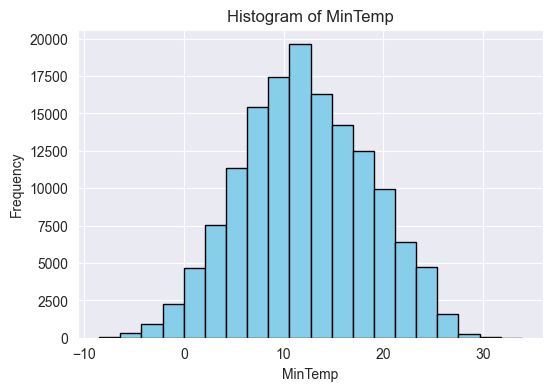

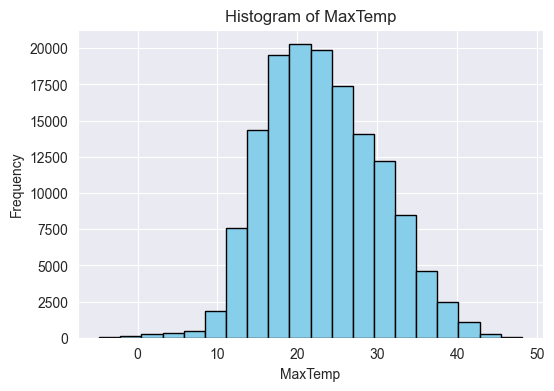

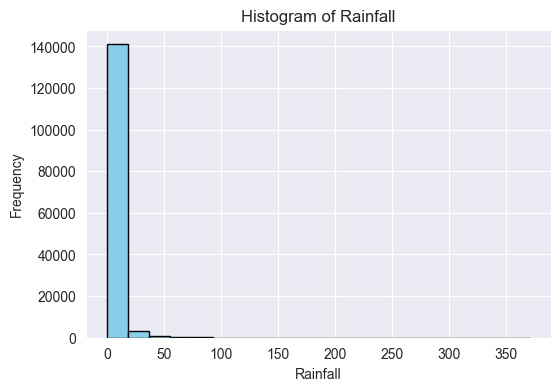

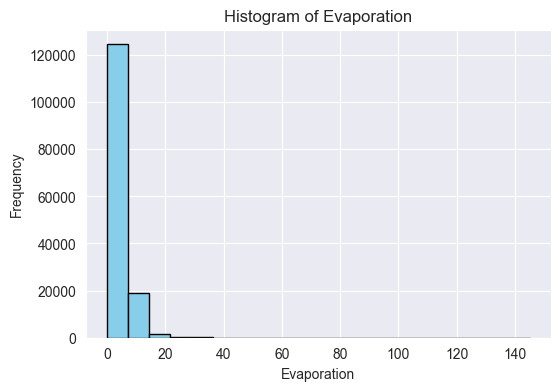

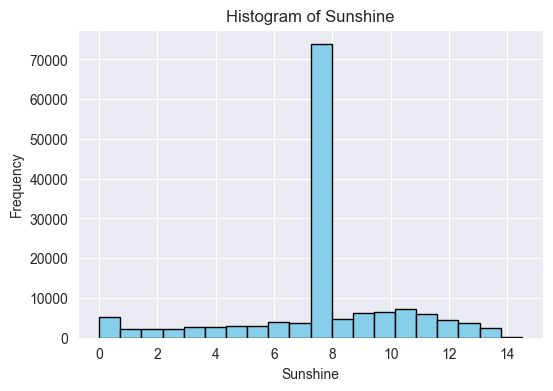

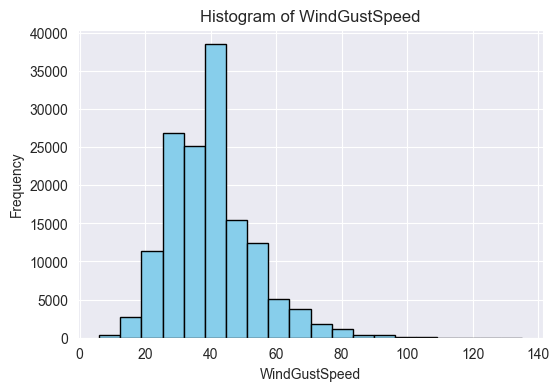

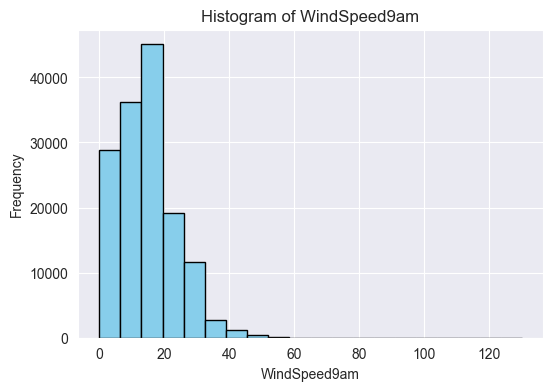

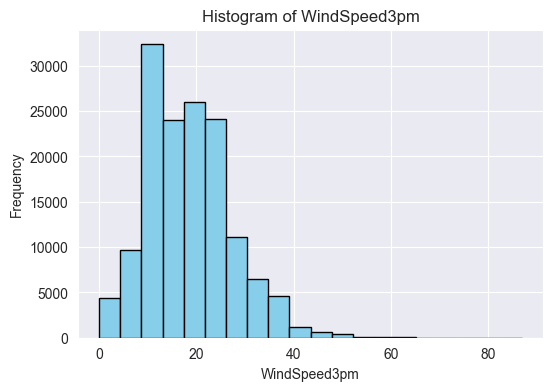

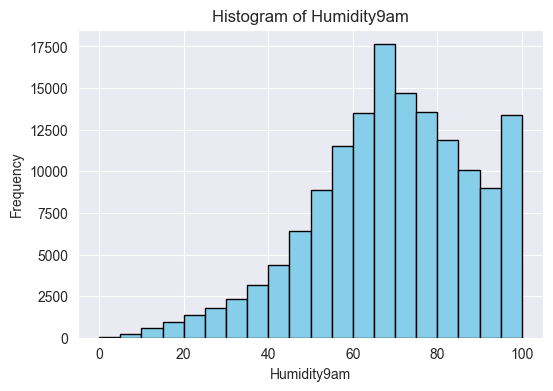

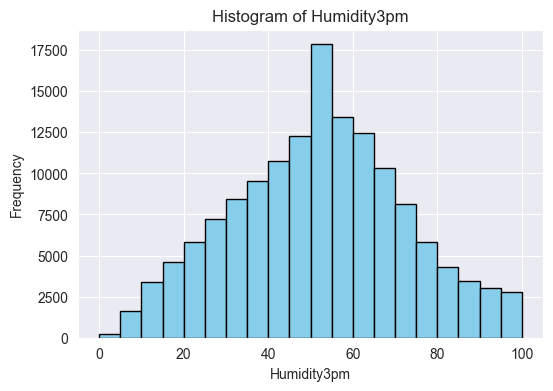

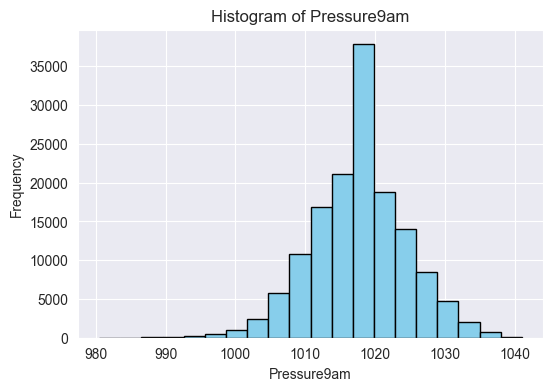

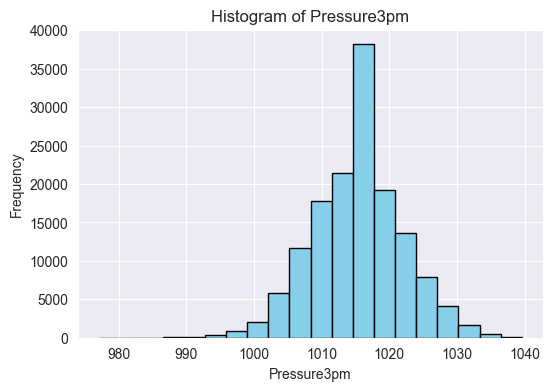

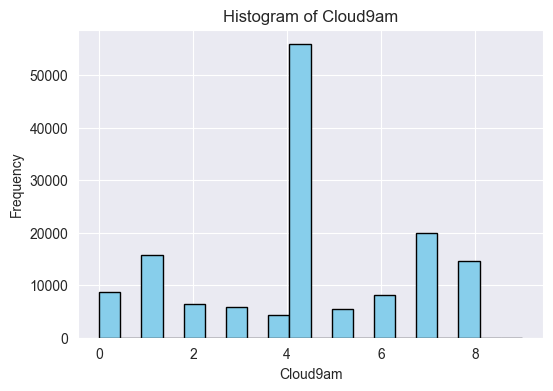

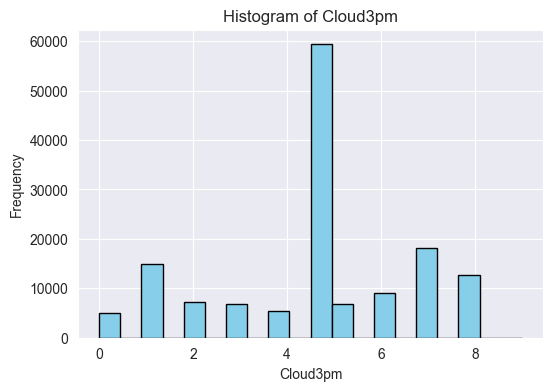

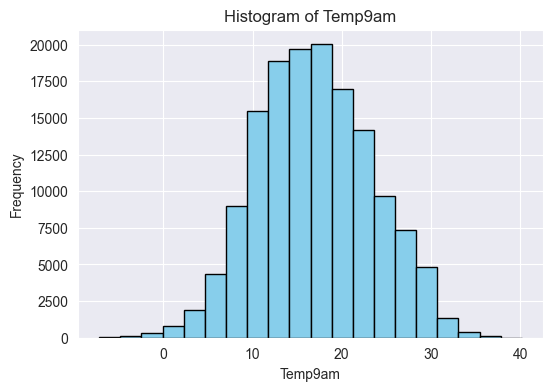

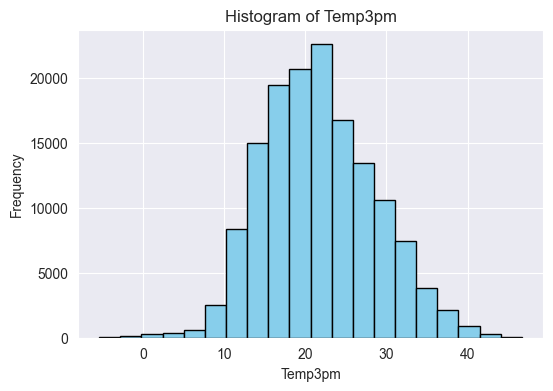

In [58]:
numerical_cols = dataframe.select_dtypes(include=['float64'])

for col in numerical_cols.columns:   # 用 .columns 遍历列名
    plt.figure(figsize=(6,4))
    plt.hist(numerical_cols[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

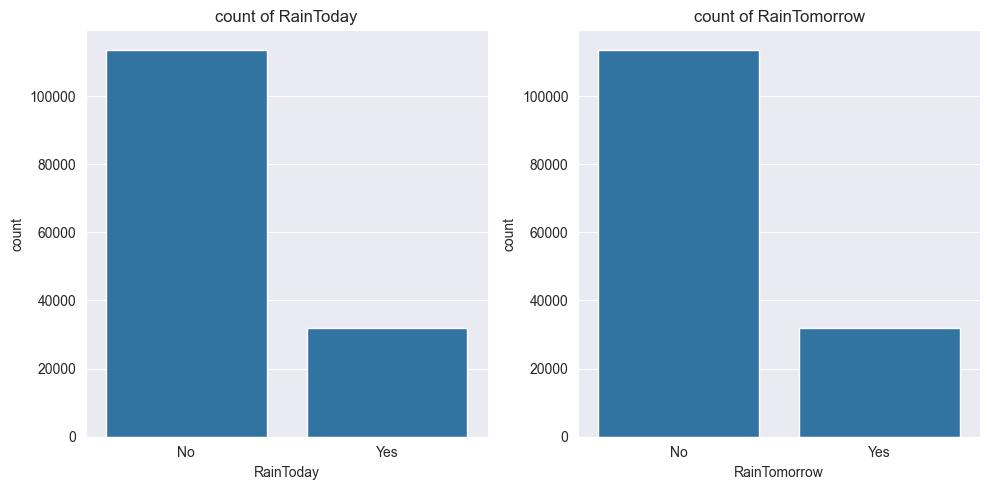

In [59]:
categorical_cols = ['RainToday','RainTomorrow']
plt.figure(figsize=(10,5))
for i, col in enumerate(categorical_cols, 1): 
    plt.subplot(1, 2, i)
    sns.countplot(data=dataframe, x=col, order=dataframe[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'count of {col}')
    
plt.tight_layout()
plt.show()

In [60]:
print('可见不是平均特征')

可见不是平均特征


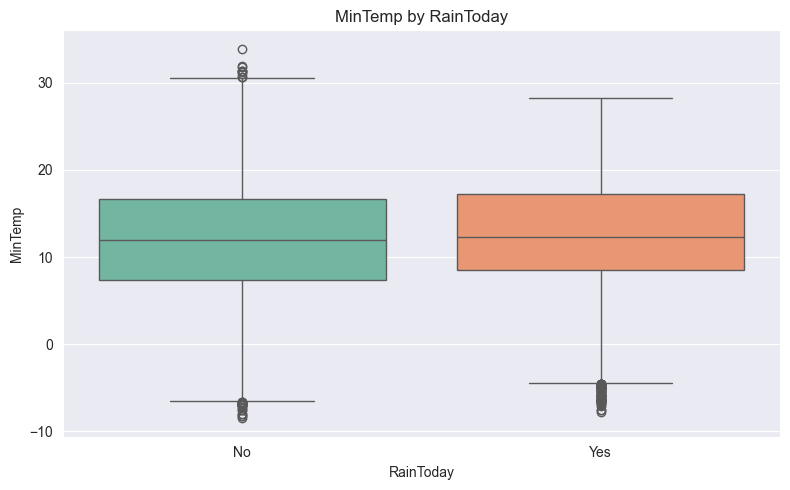

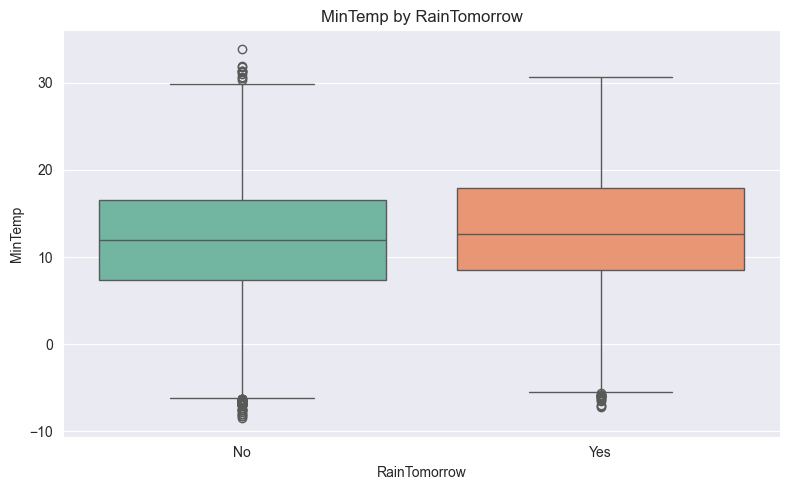

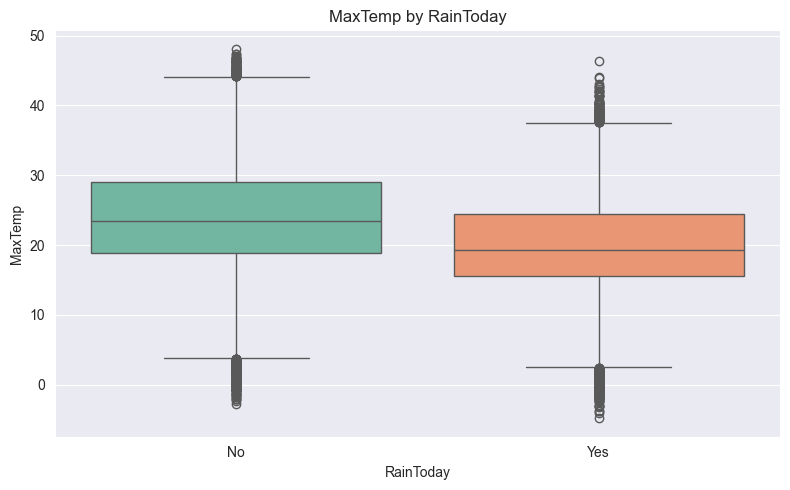

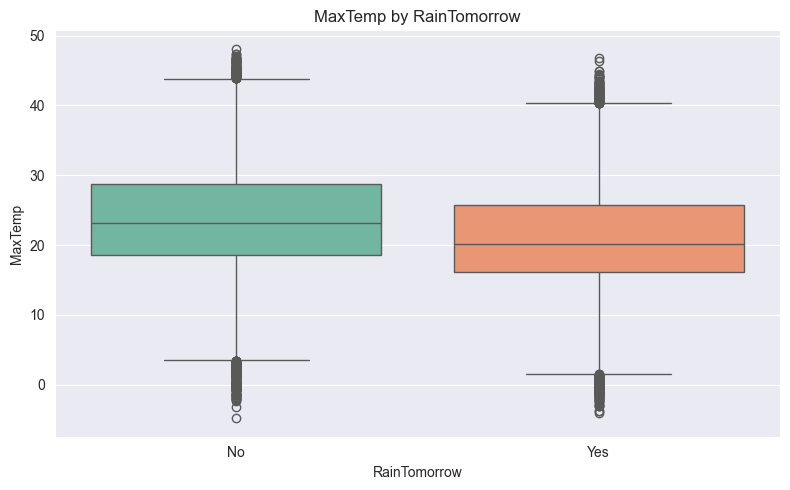

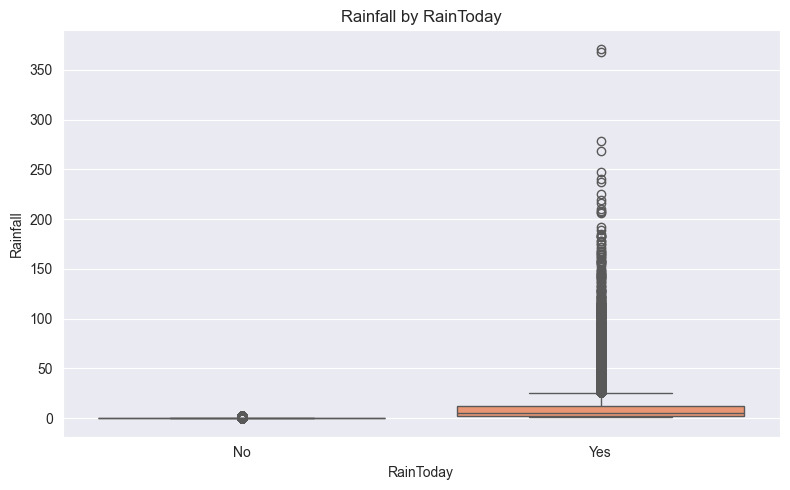

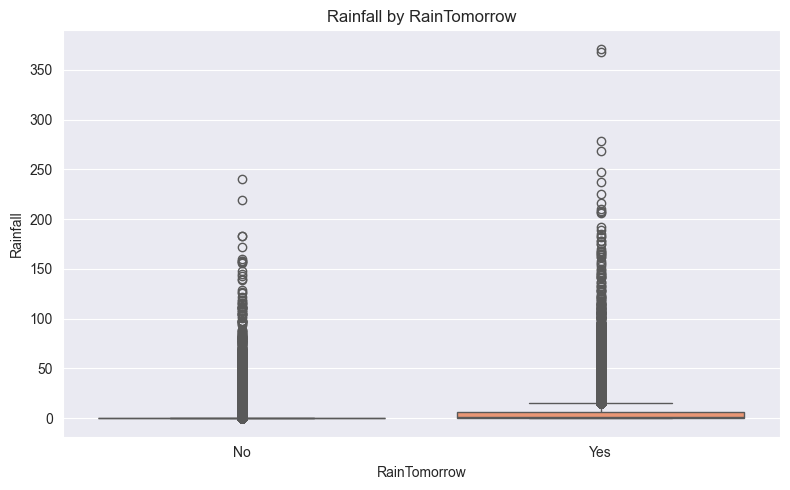

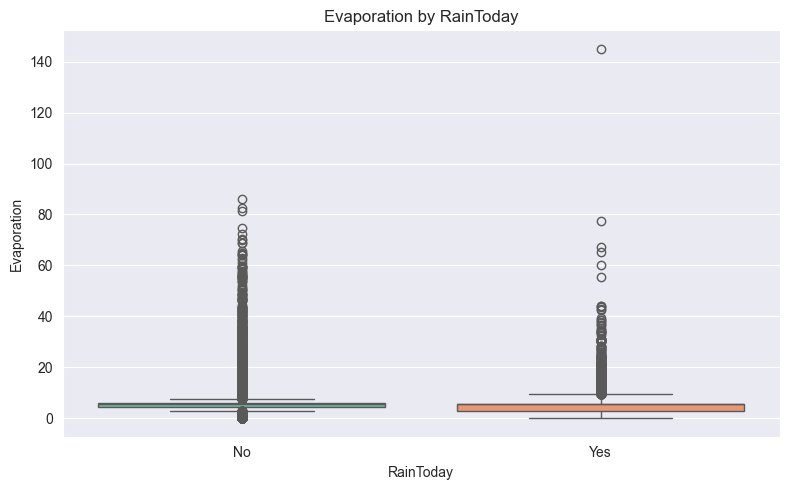

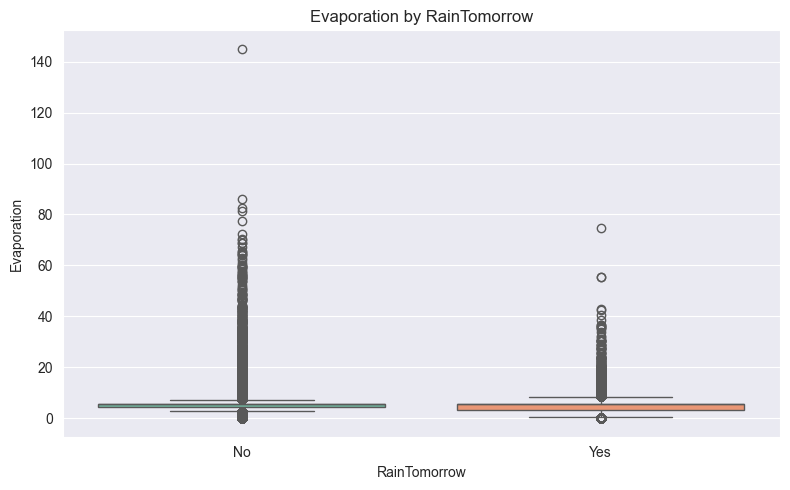

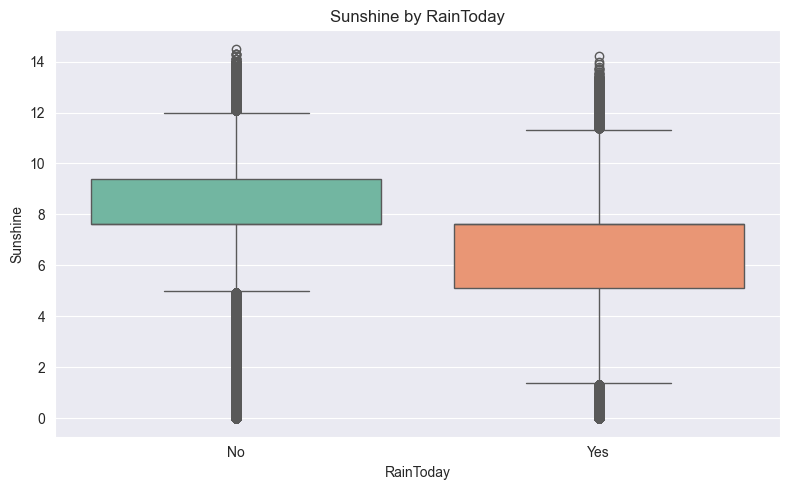

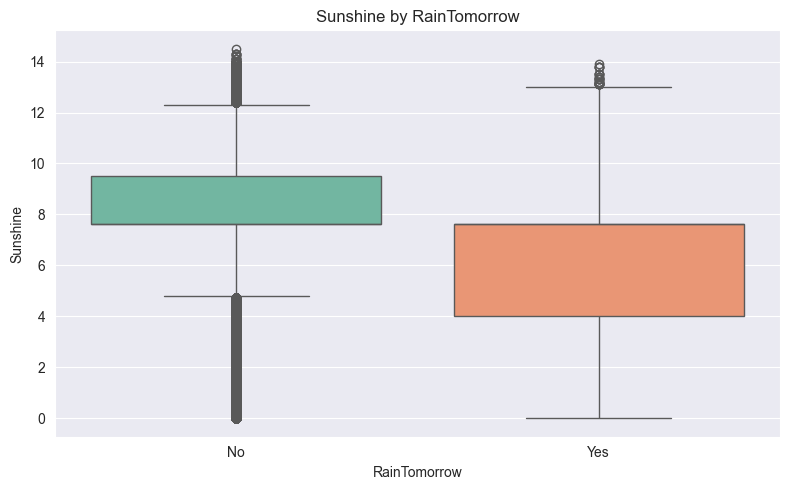

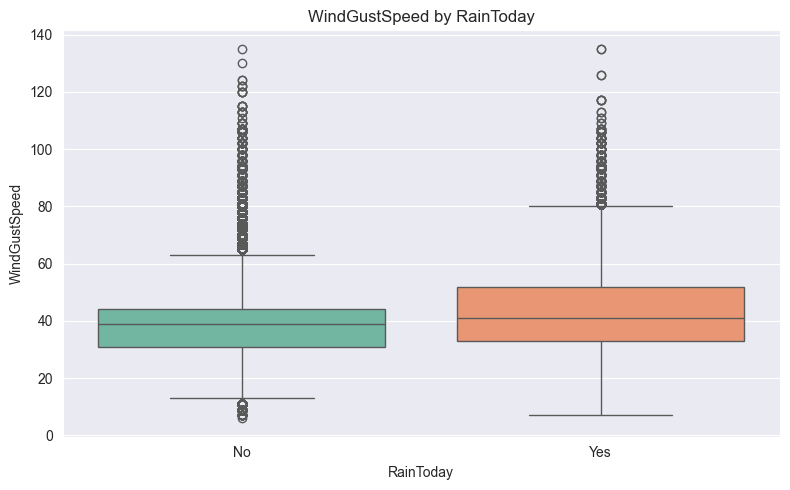

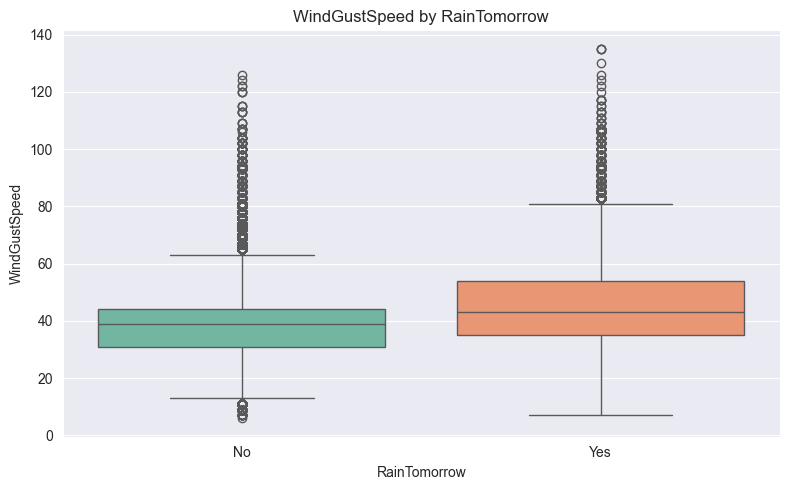

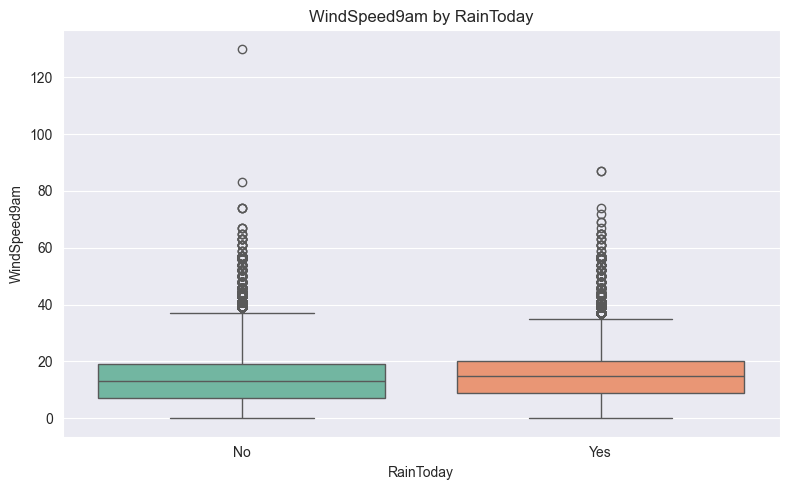

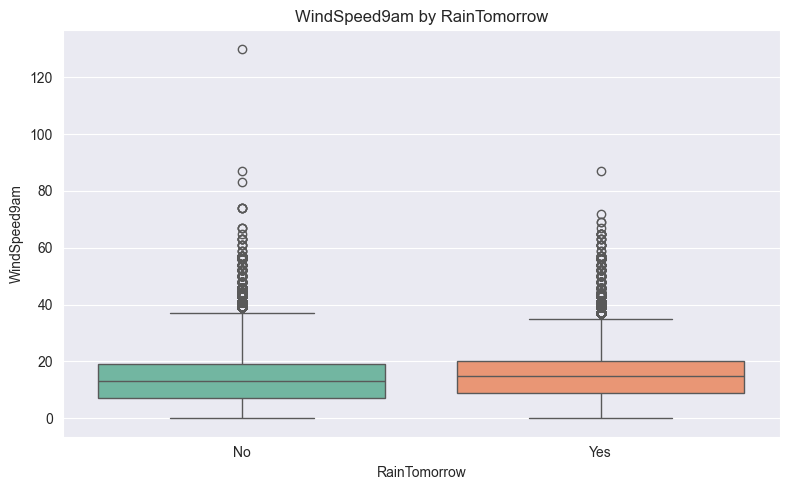

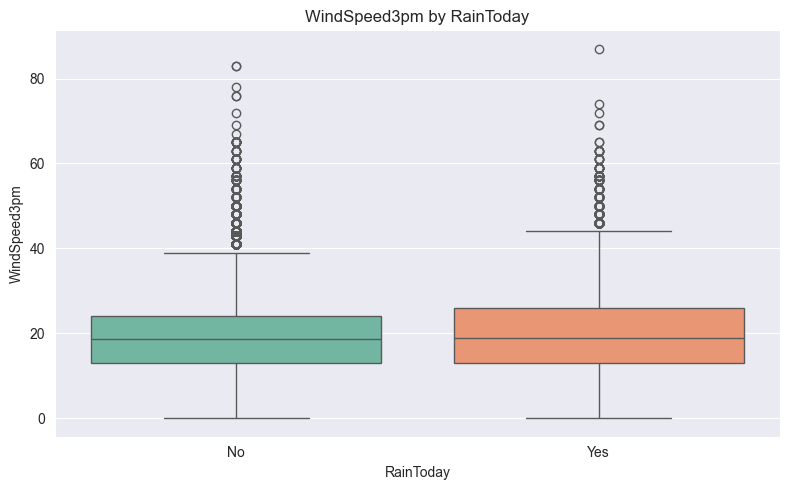

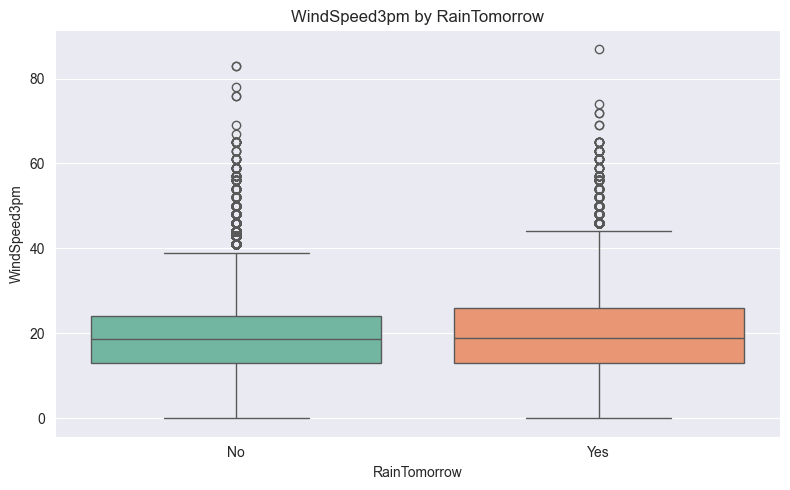

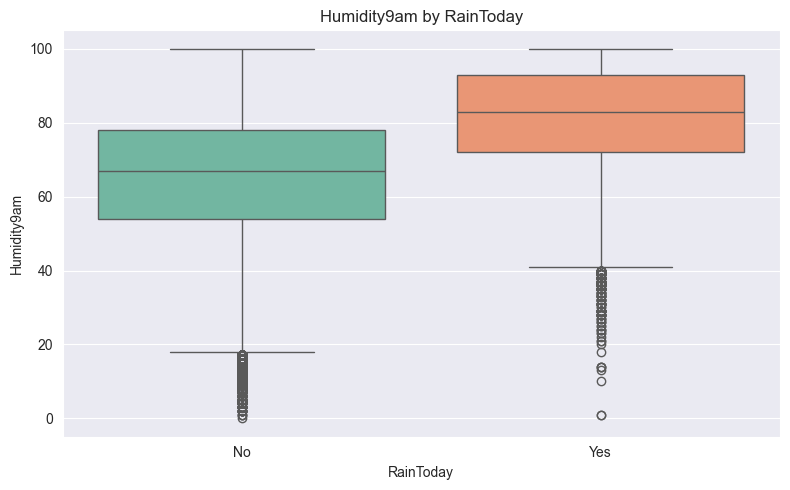

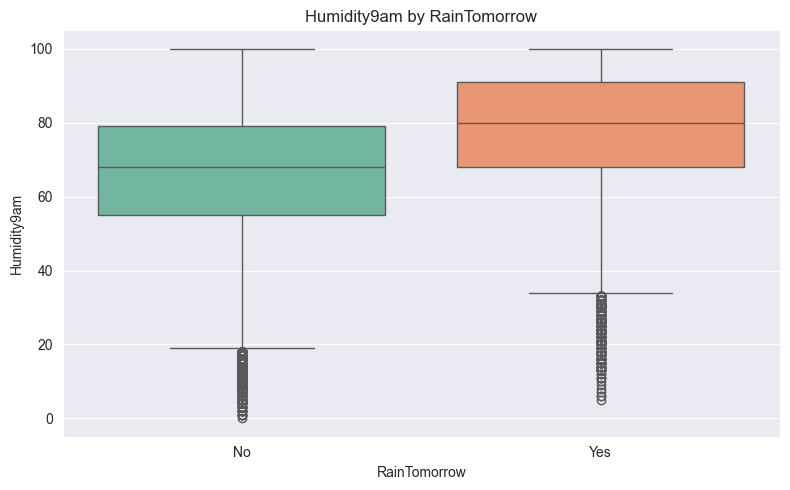

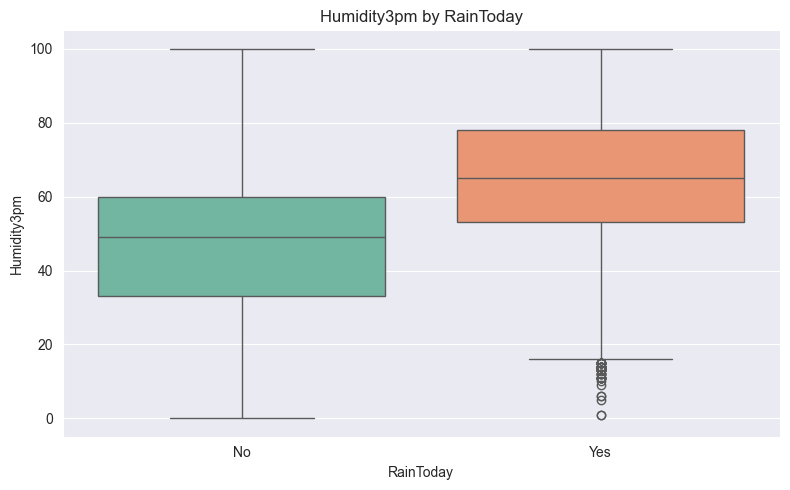

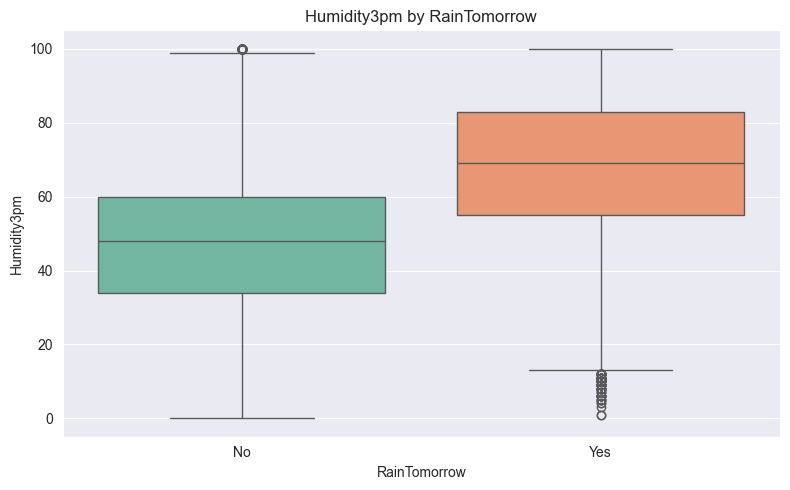

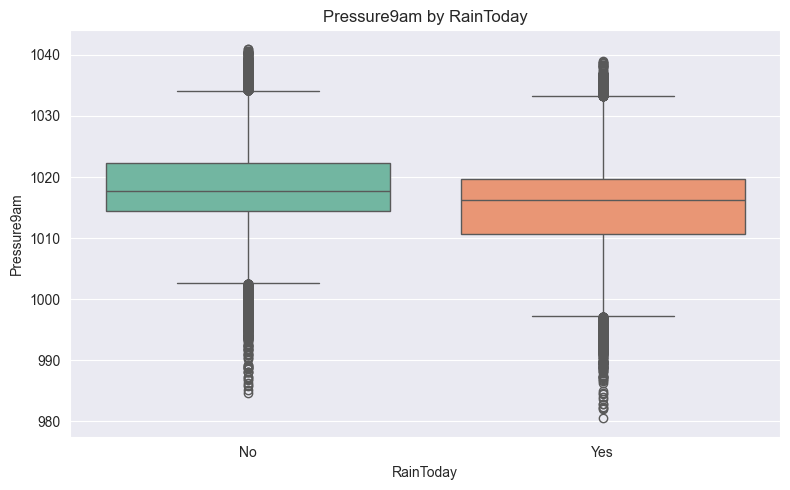

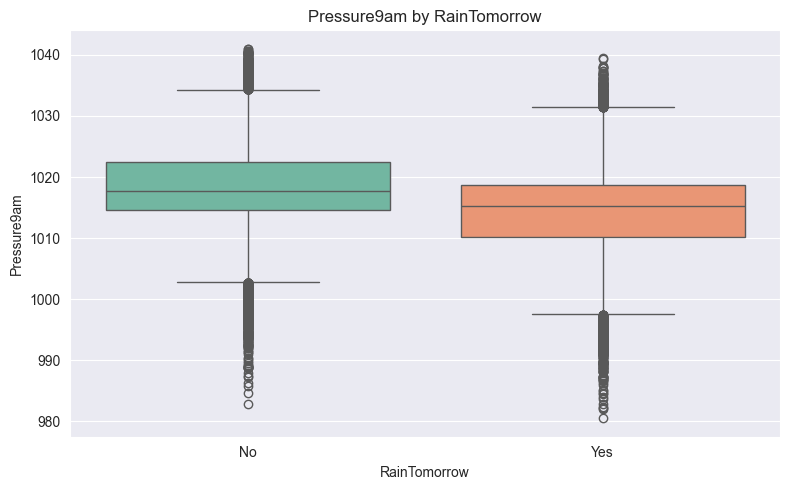

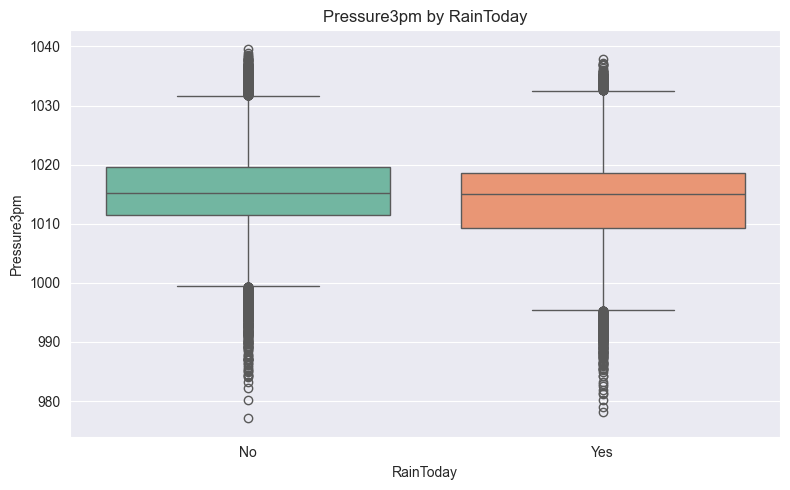

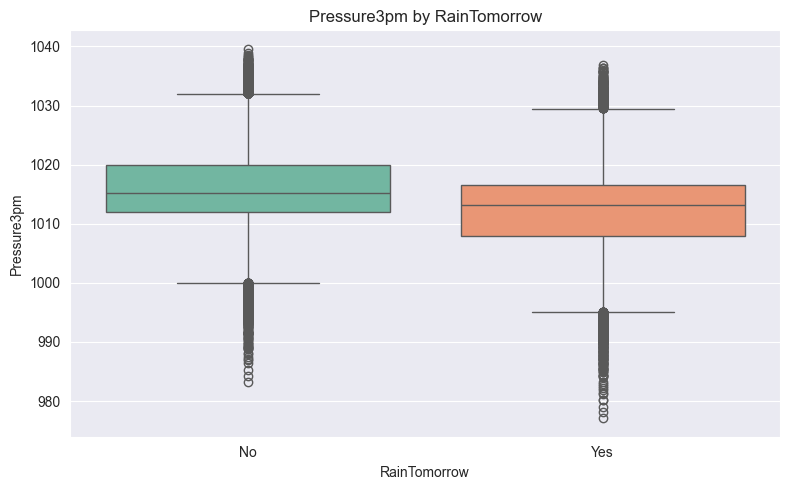

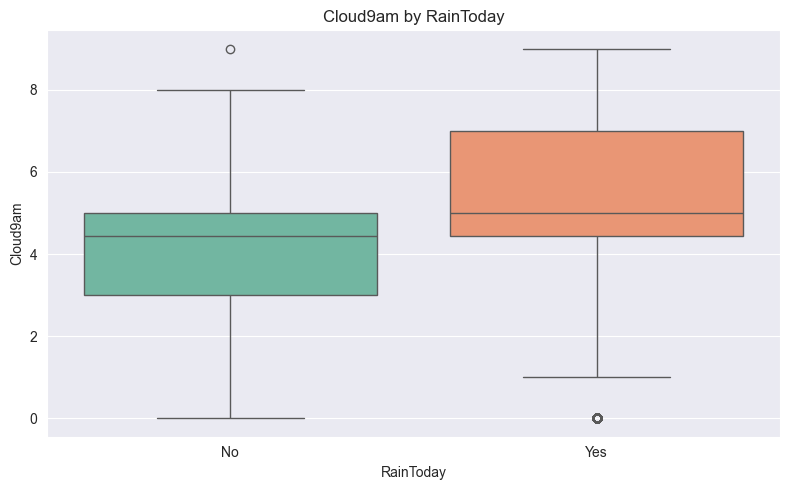

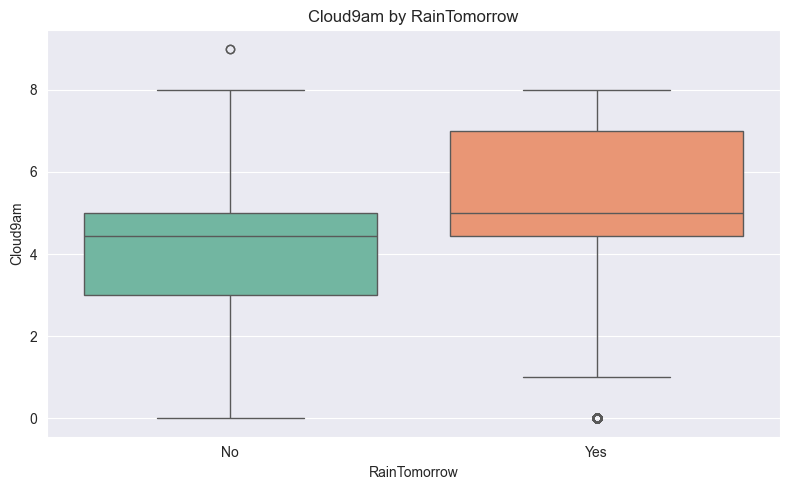

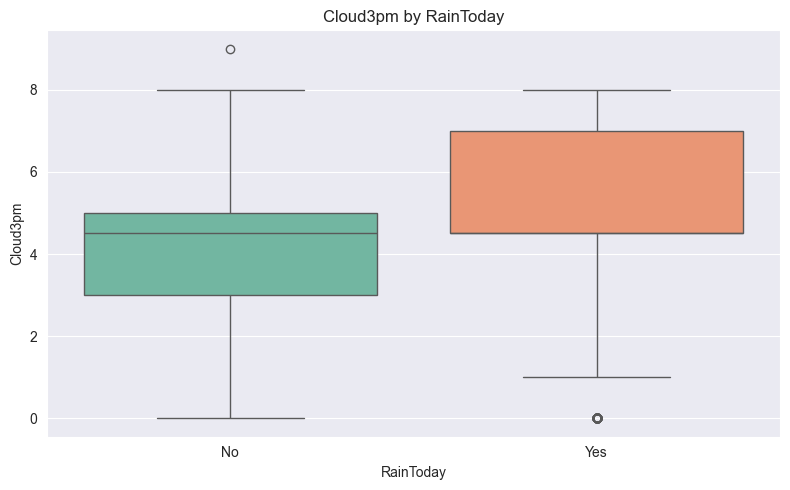

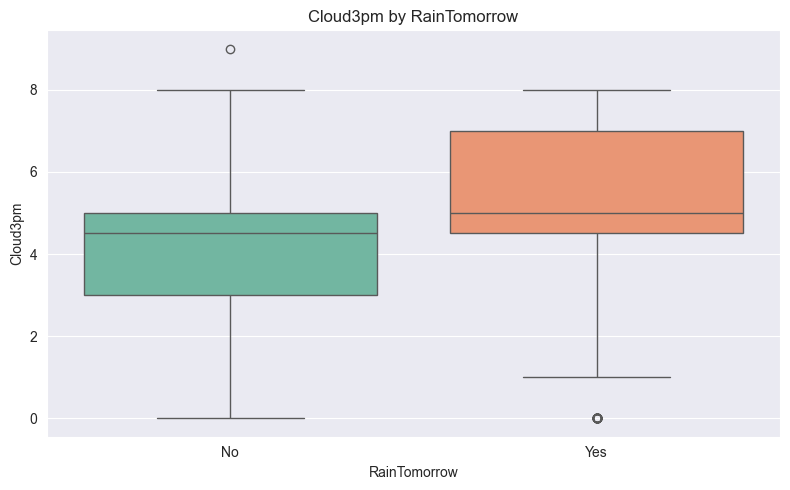

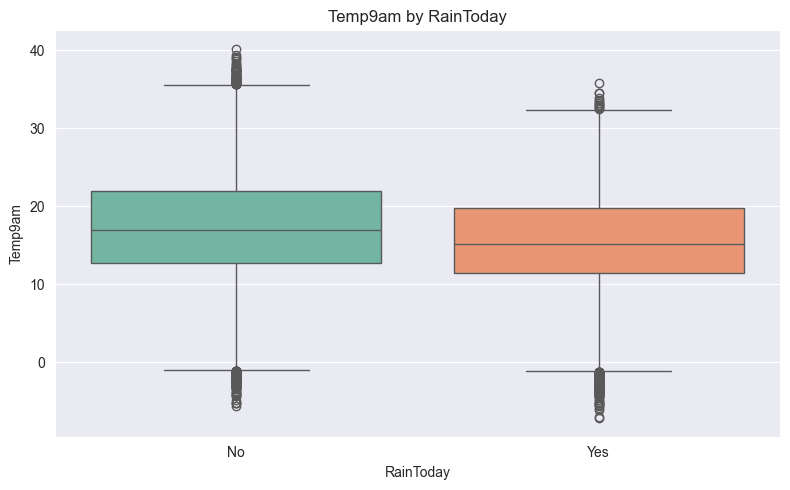

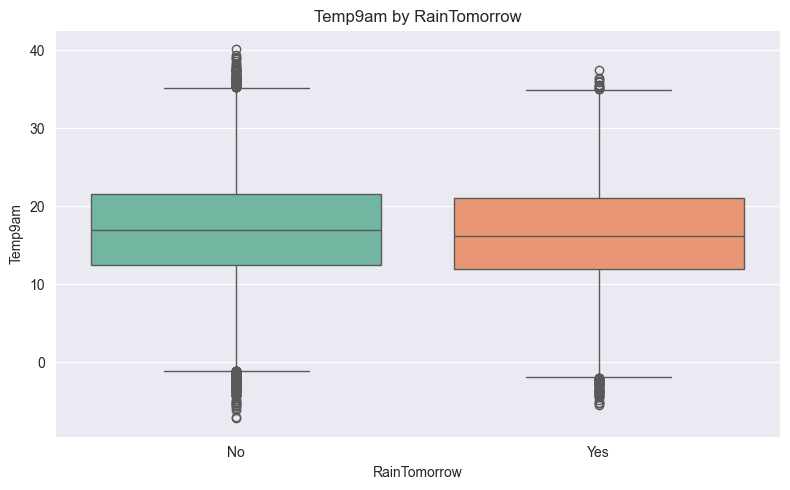

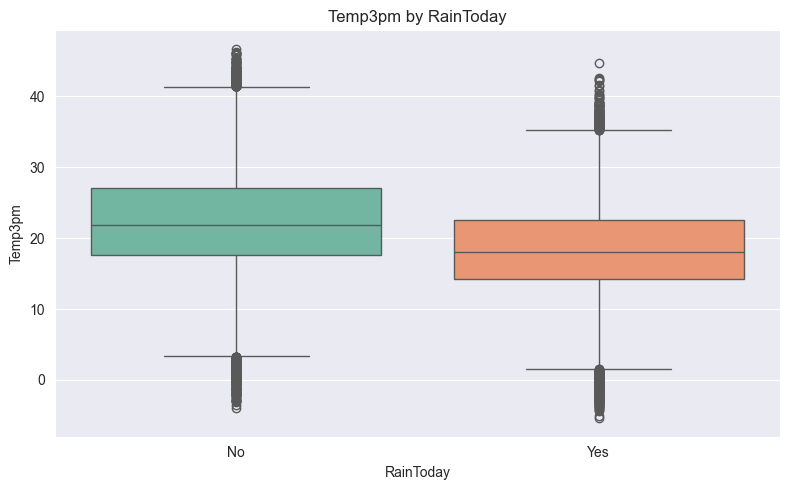

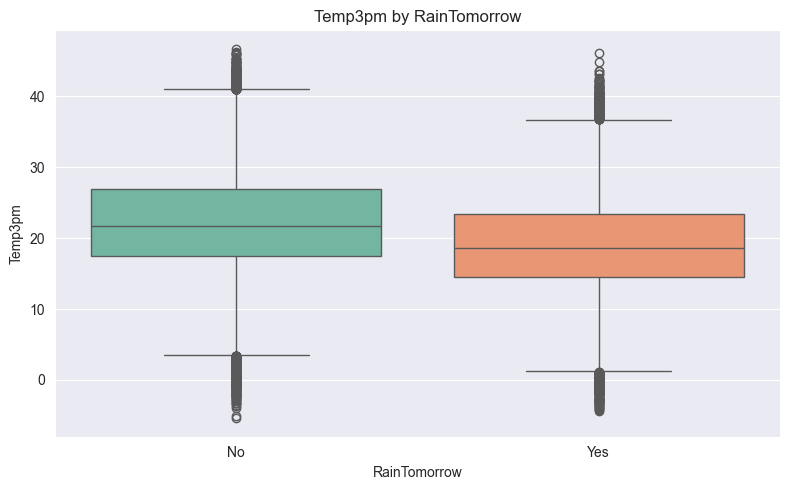

In [61]:
for num_col in numerical_cols:
    for cat_col in categorical_cols:
       plt.figure(figsize=(8,5))
       sns.boxplot(data = dataframe, x = cat_col, y=num_col,palette='Set2',legend=False)
       plt.title(f'{num_col} by {cat_col}')
       plt.tight_layout()
       plt.show() 

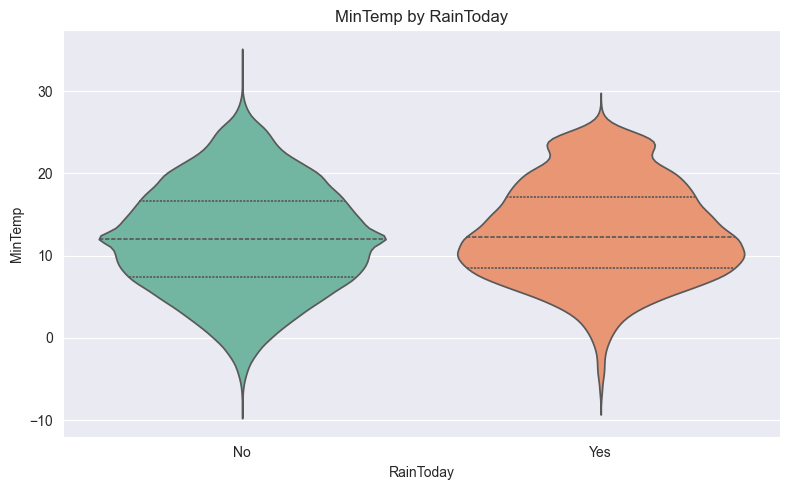

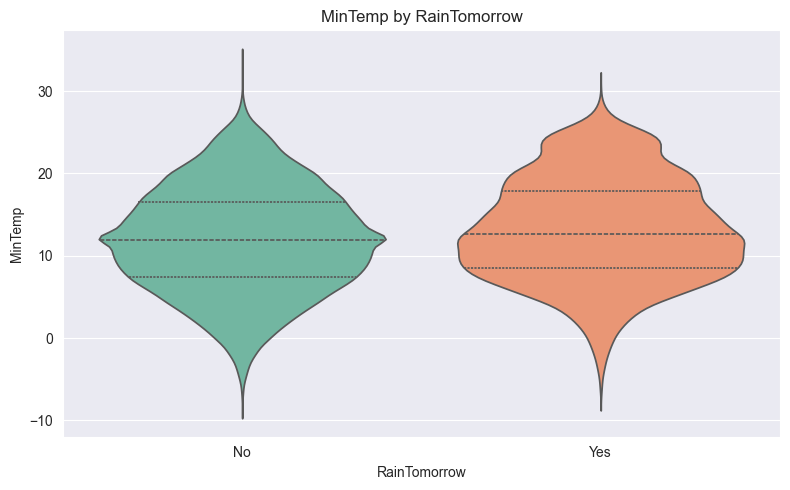

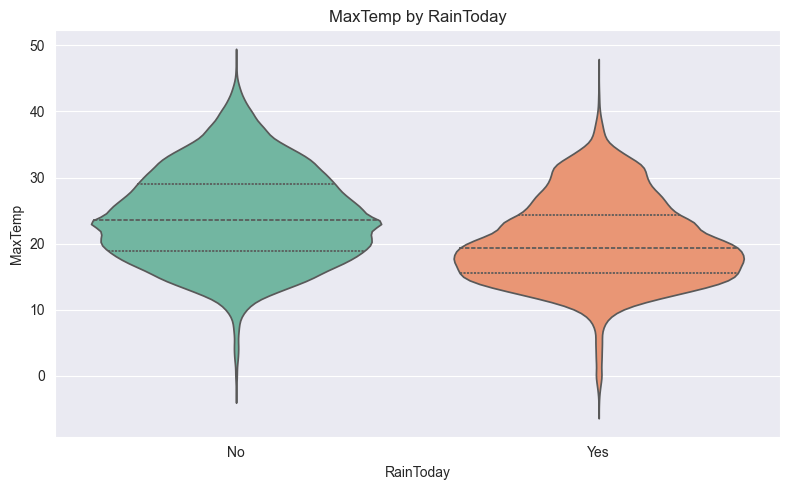

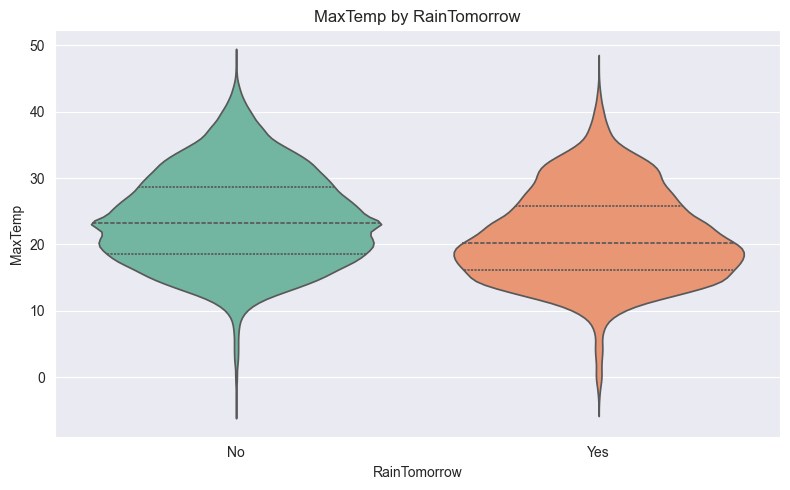

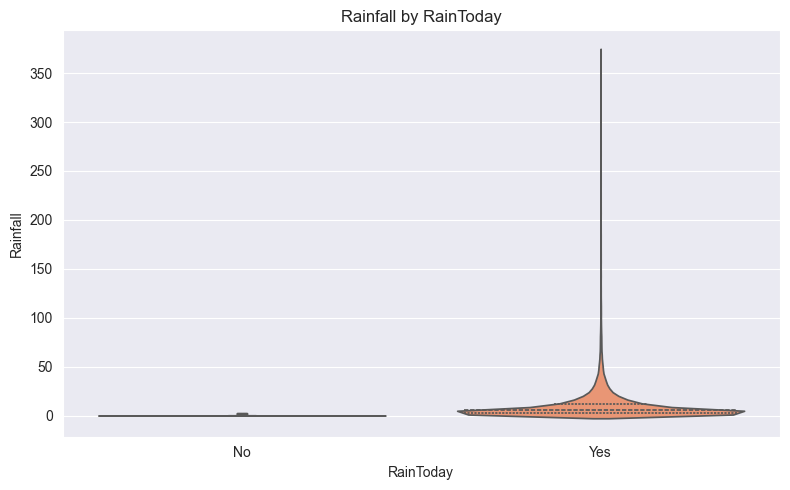

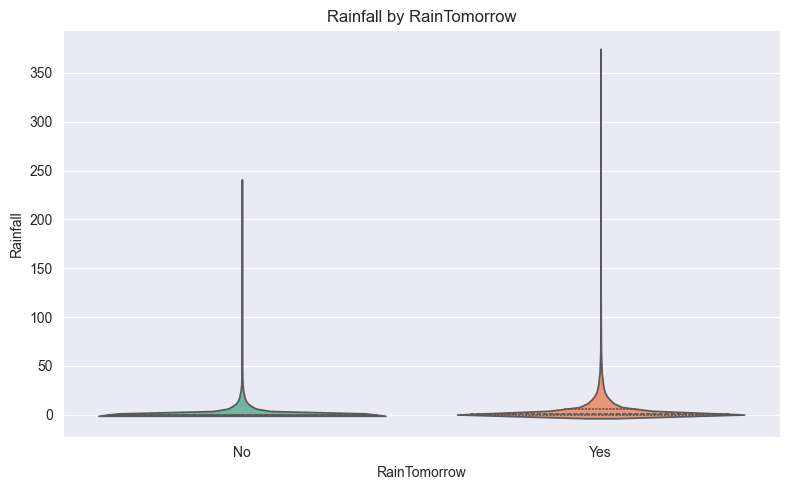

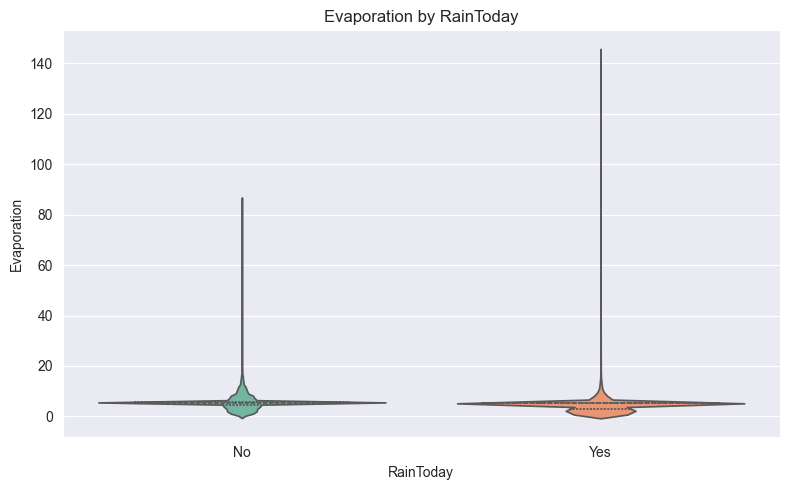

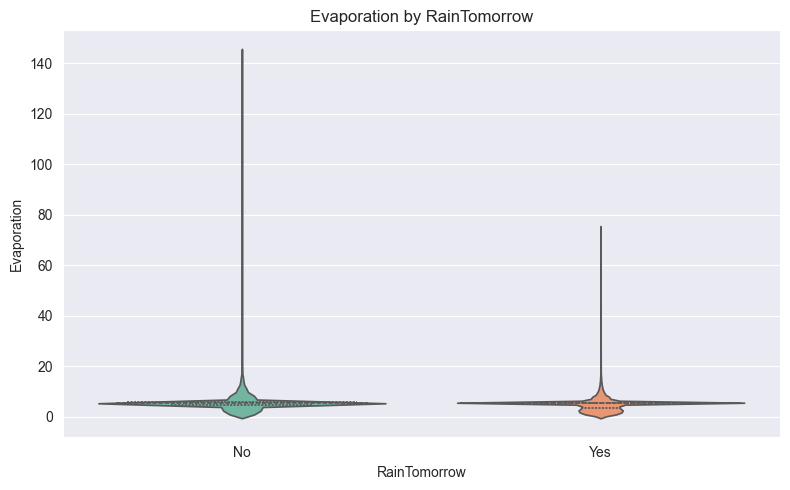

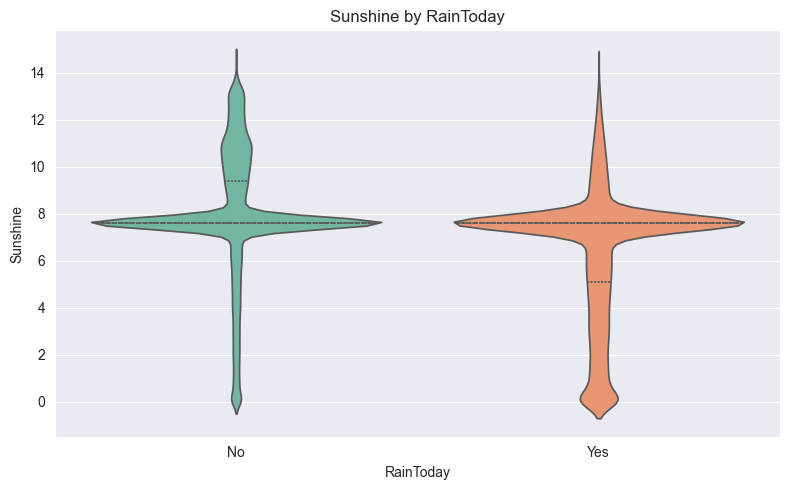

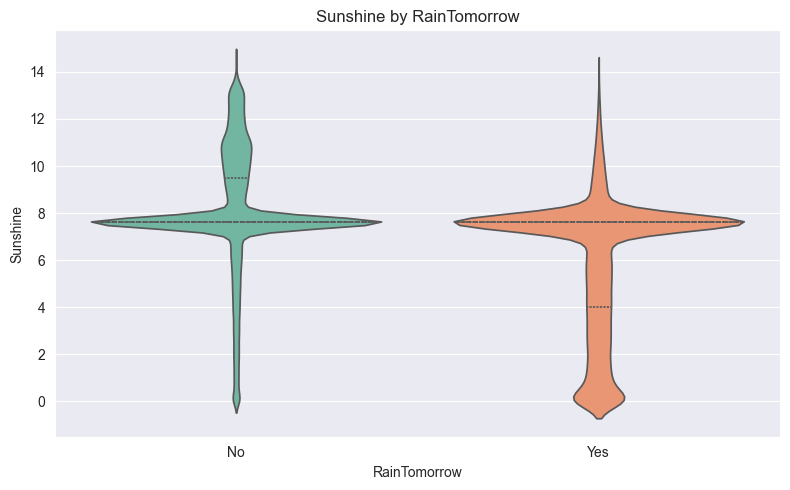

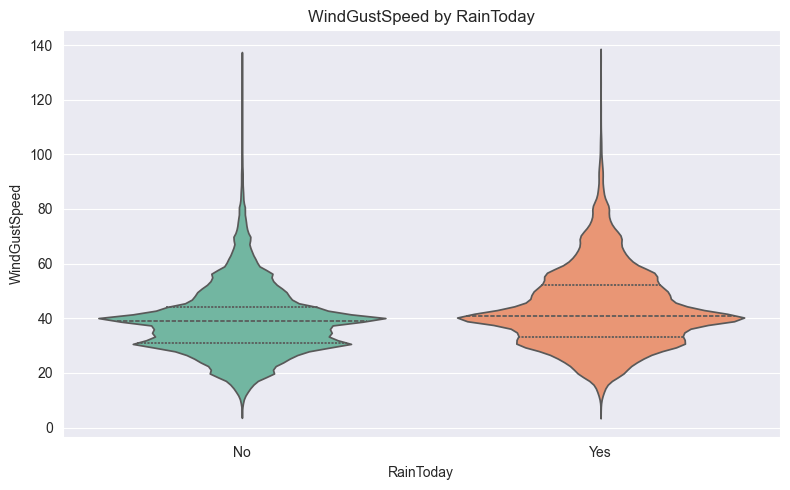

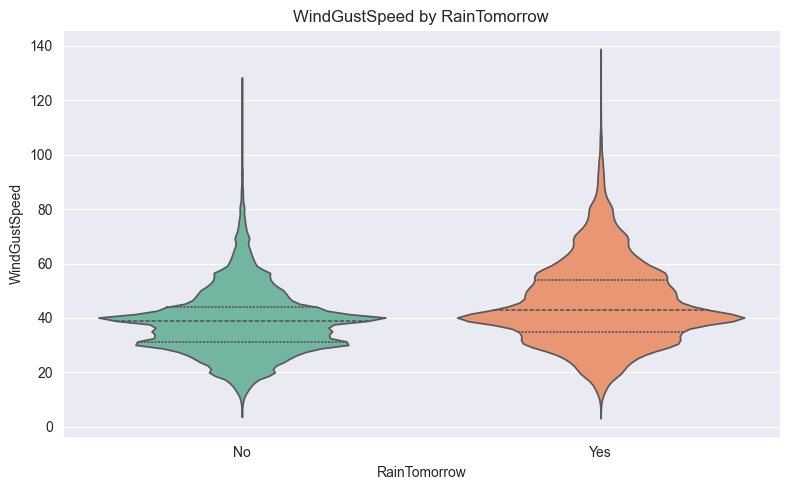

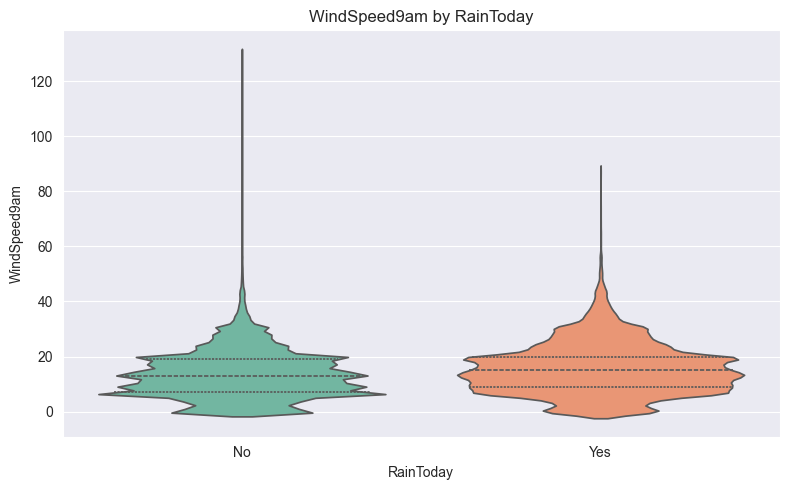

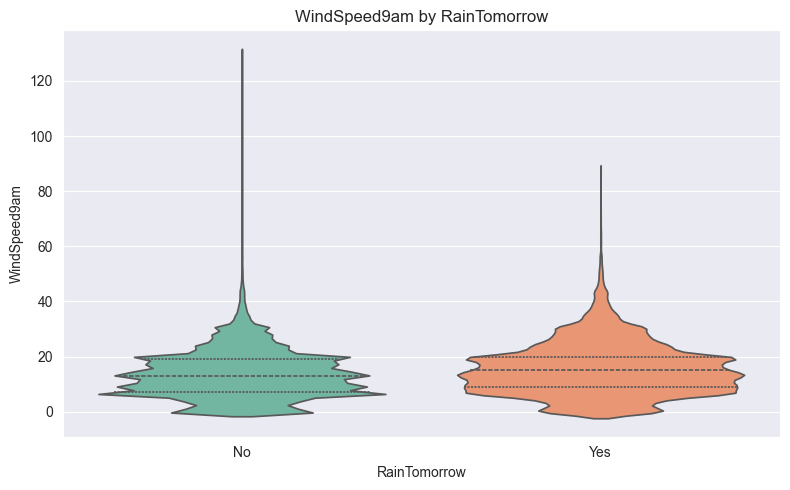

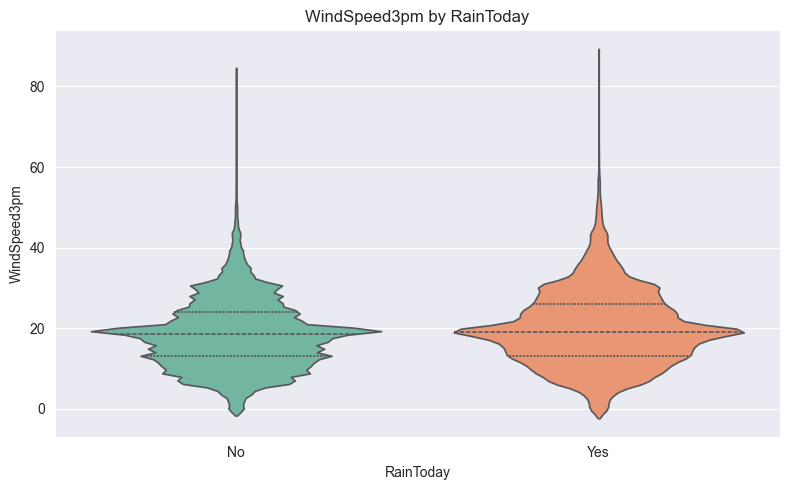

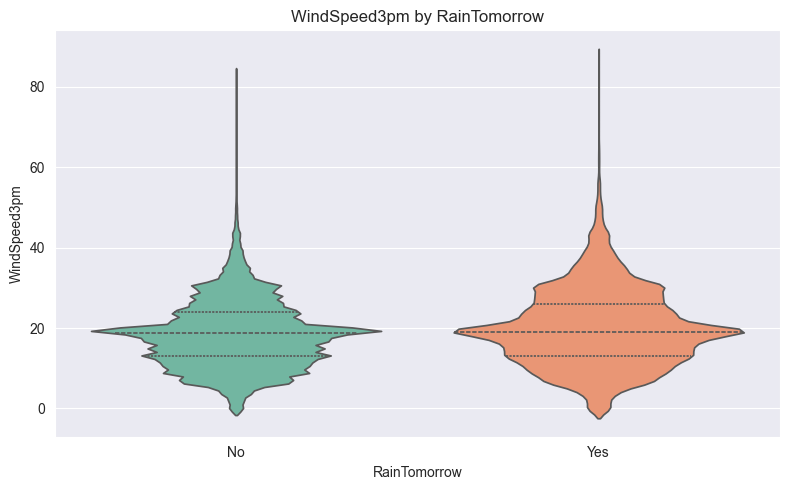

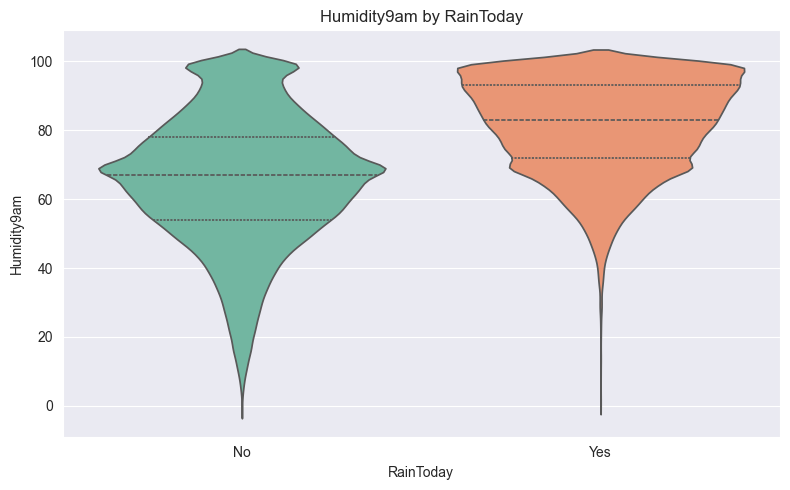

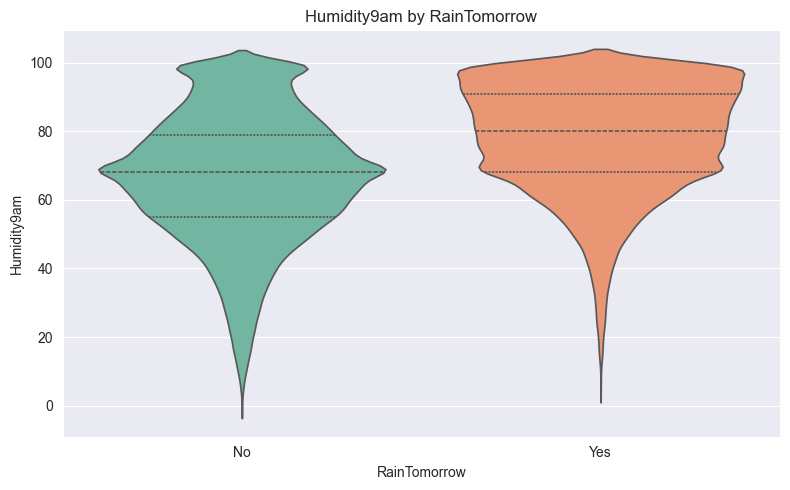

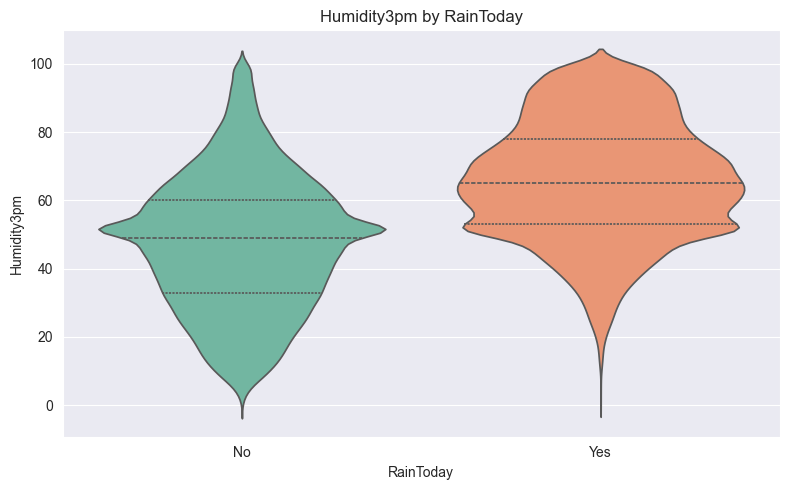

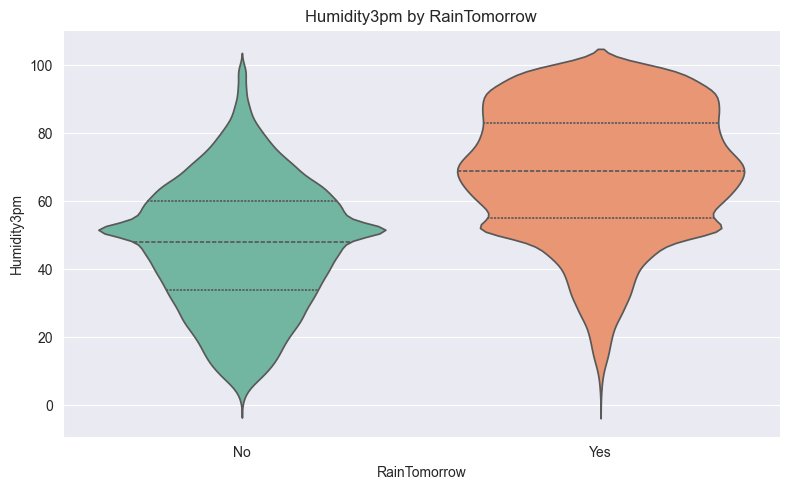

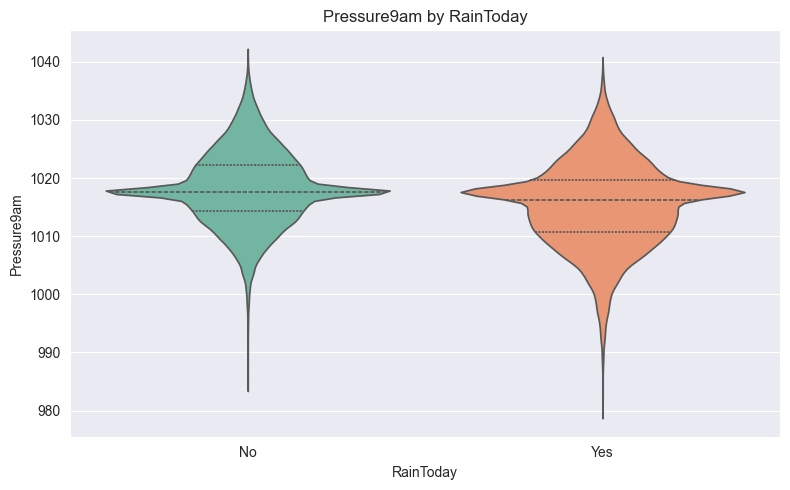

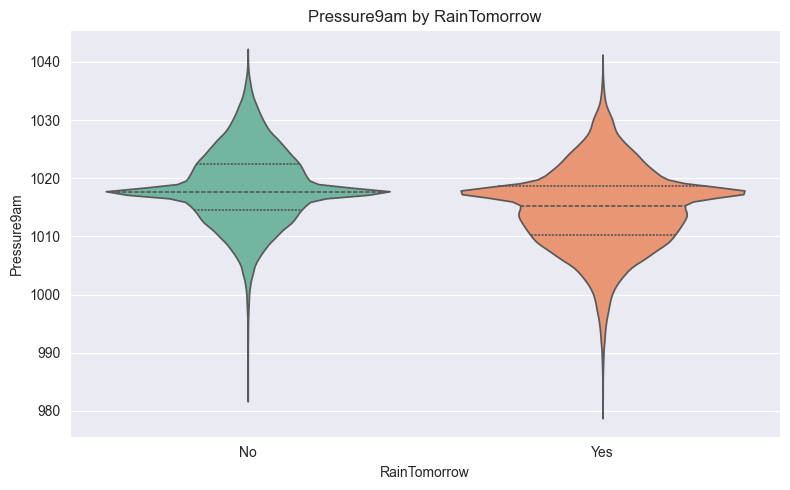

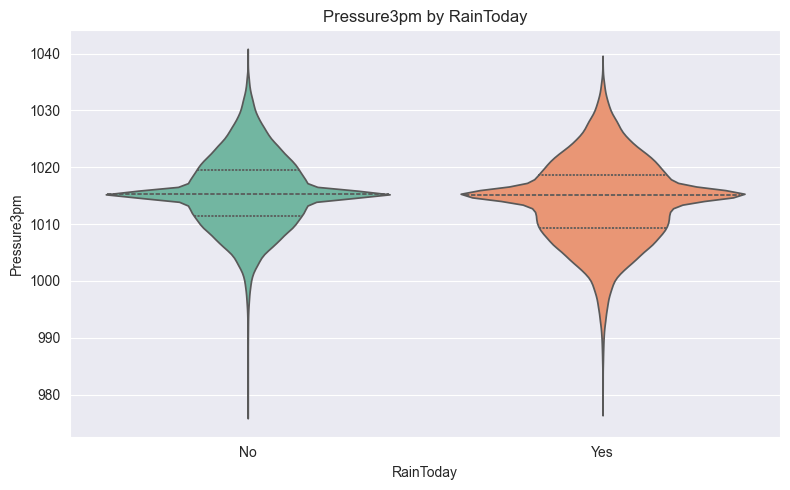

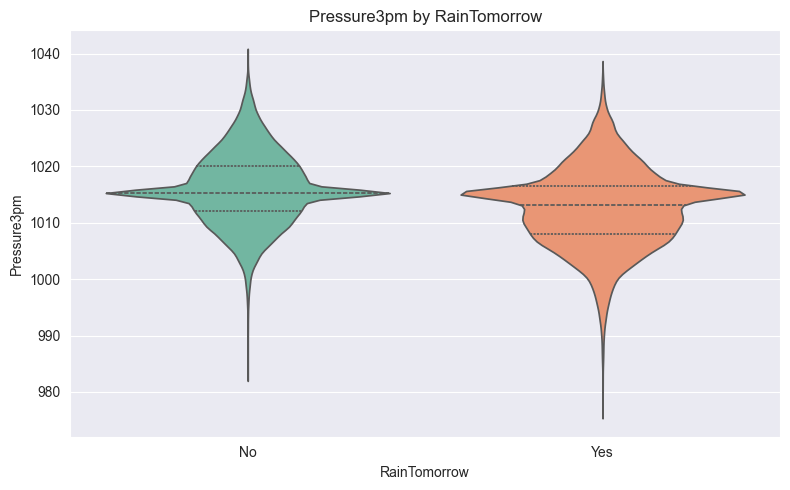

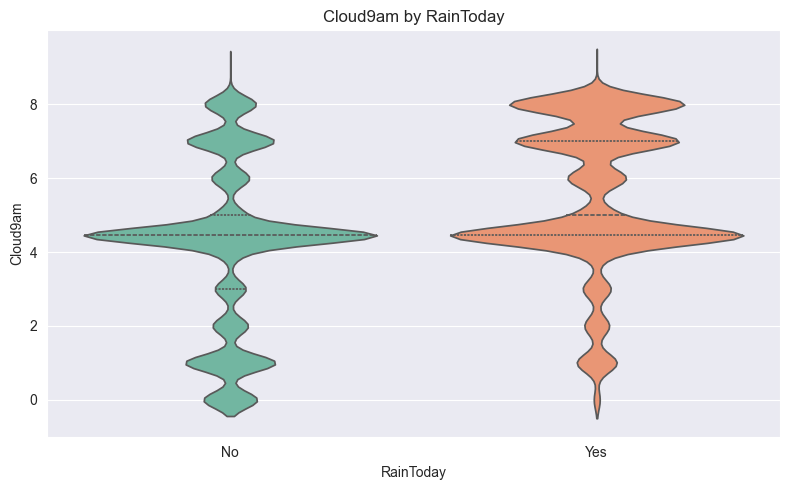

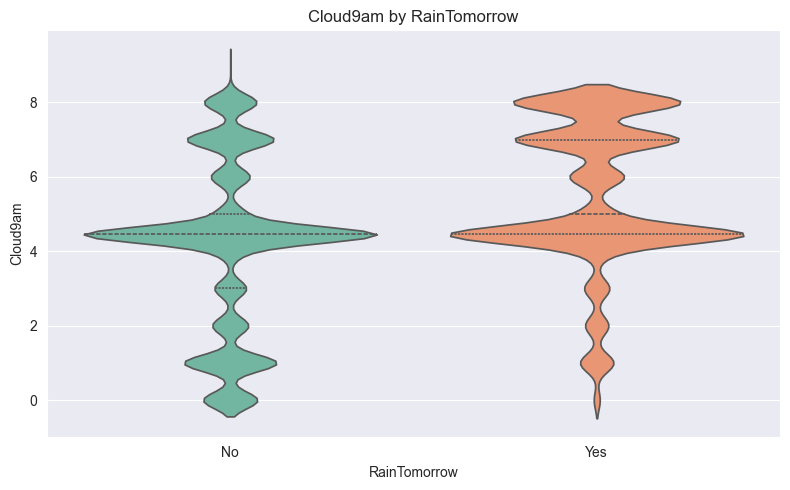

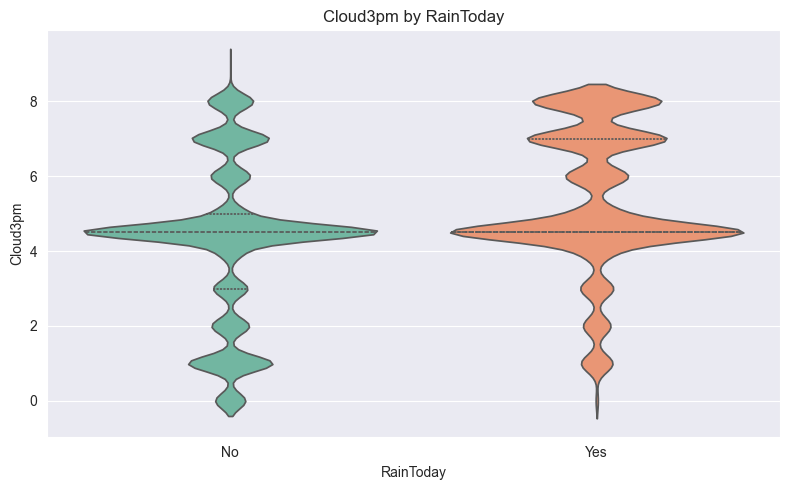

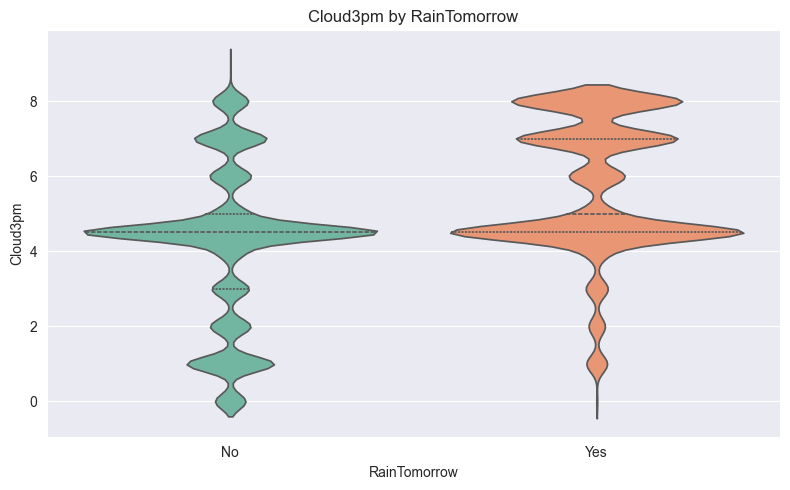

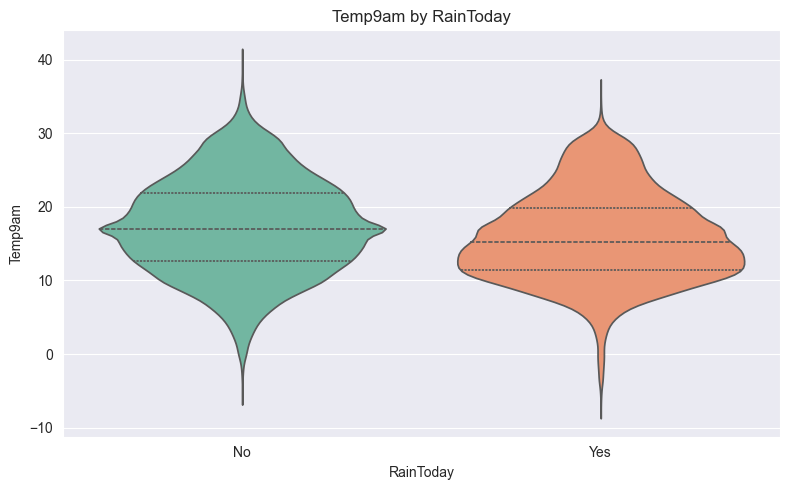

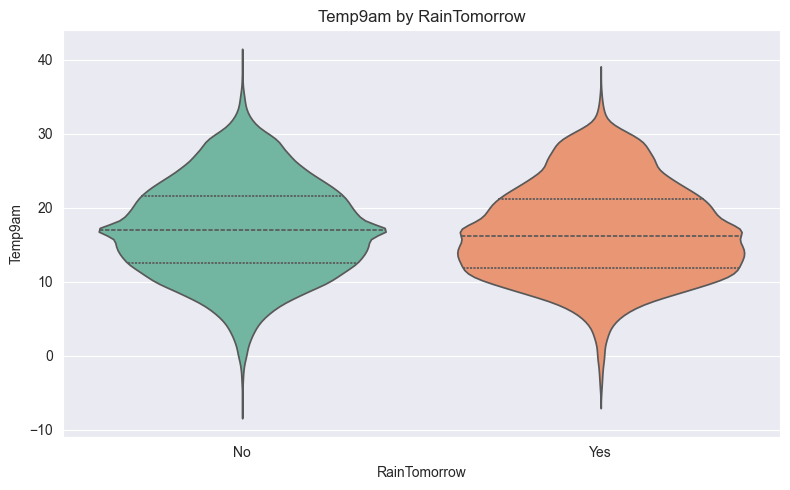

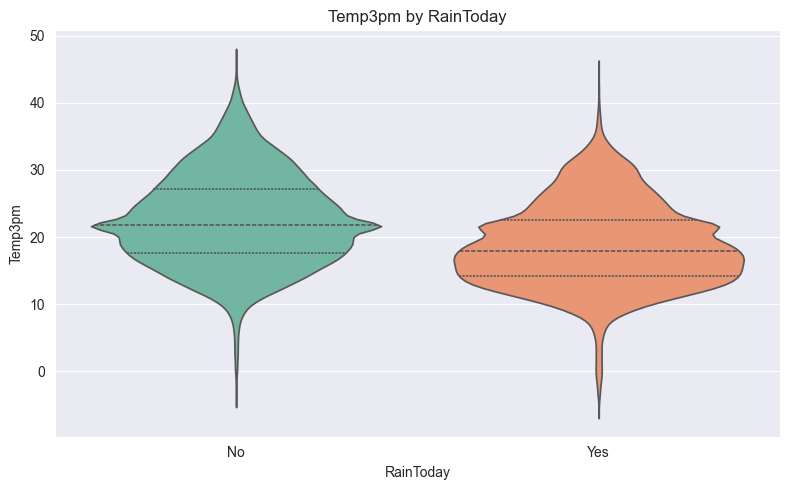

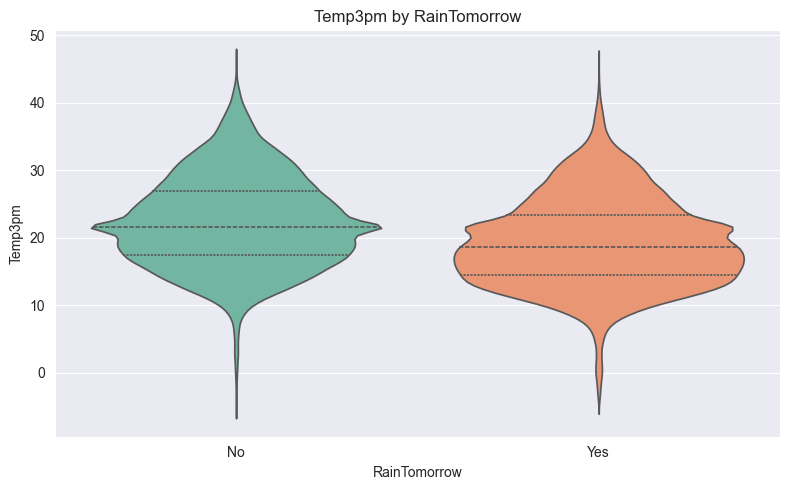

In [62]:
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8,5))
        sns.violinplot(data=dataframe, x = cat_col, y=num_col,palette='Set2',inner='quartile')
        plt.title(f'{num_col} by {cat_col}')
        plt.tight_layout()
        plt.show()

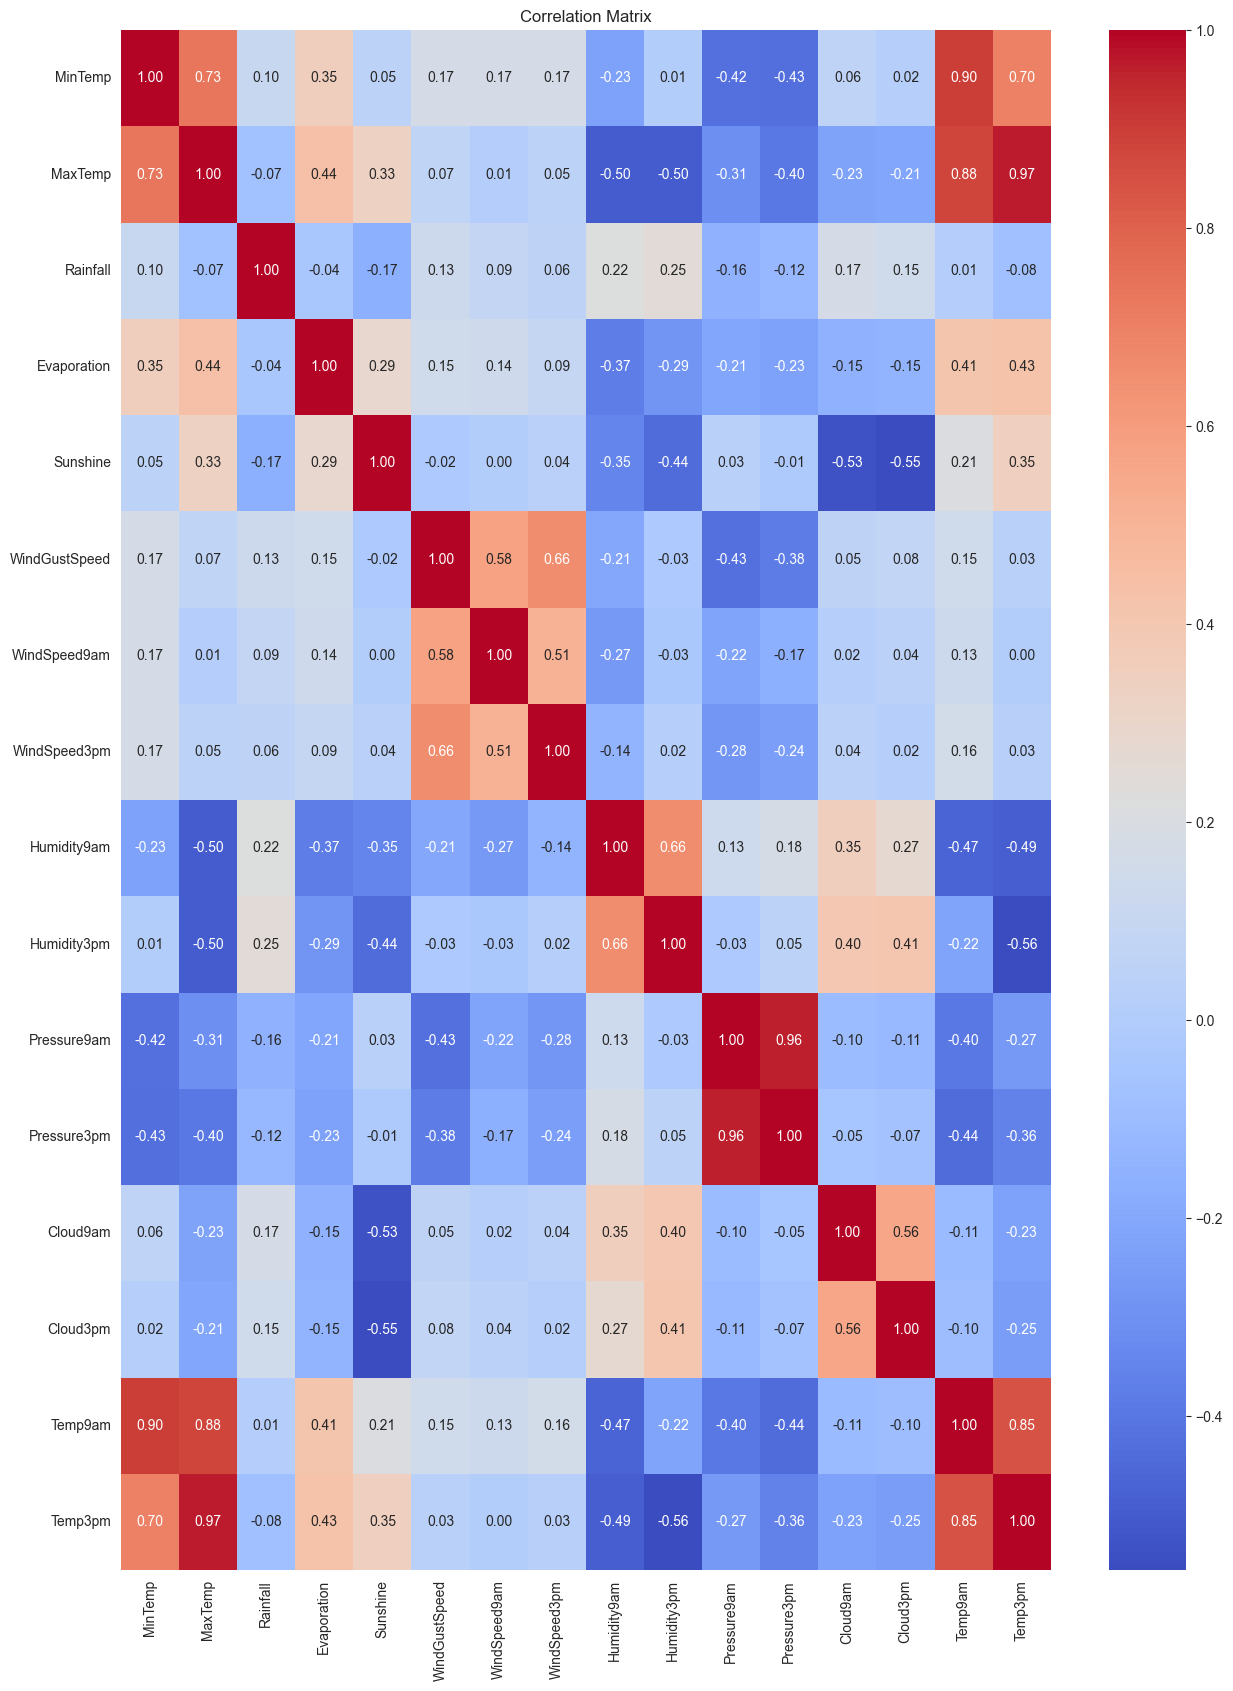

In [63]:
corr_matrix = numerical_cols.corr() 
plt.figure(figsize=(15,20))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True
)
plt.title('Correlation Matrix')
plt.show()


Logistic Regression Accuracy: 0.8458682799395023
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22817
           1       0.72      0.47      0.57      6275

    accuracy                           0.85     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.85      0.83     29092


 roc_auc: 0.7107596191907656


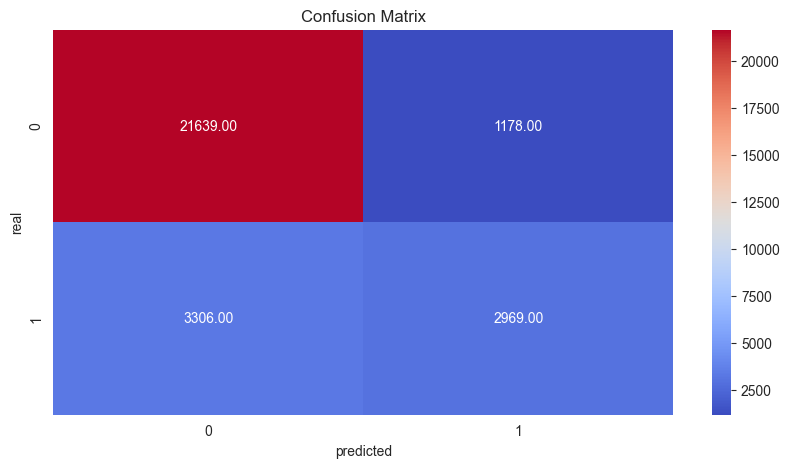


Decision Tree Accuracy: 0.7855080434483707
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     22817
           1       0.50      0.52      0.51      6275

    accuracy                           0.79     29092
   macro avg       0.68      0.69      0.69     29092
weighted avg       0.79      0.79      0.79     29092


 roc_auc: 0.6900720176662855


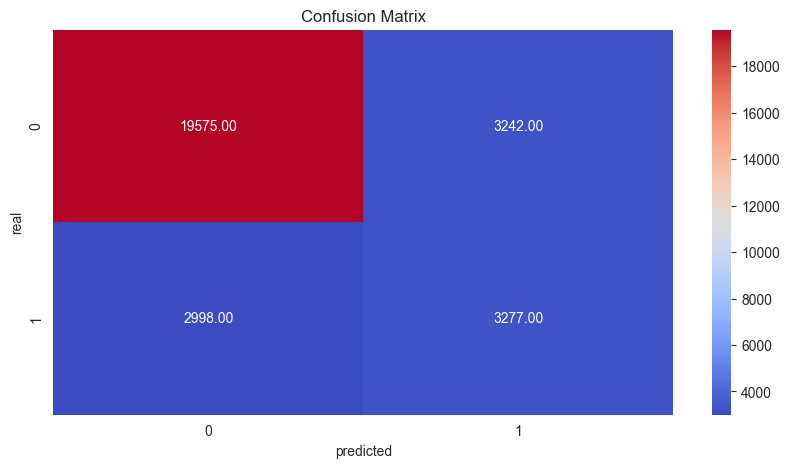


Random Forest Accuracy: 0.858449058160319
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22817
           1       0.76      0.50      0.60      6275

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092


 roc_auc: 0.7277917300426204


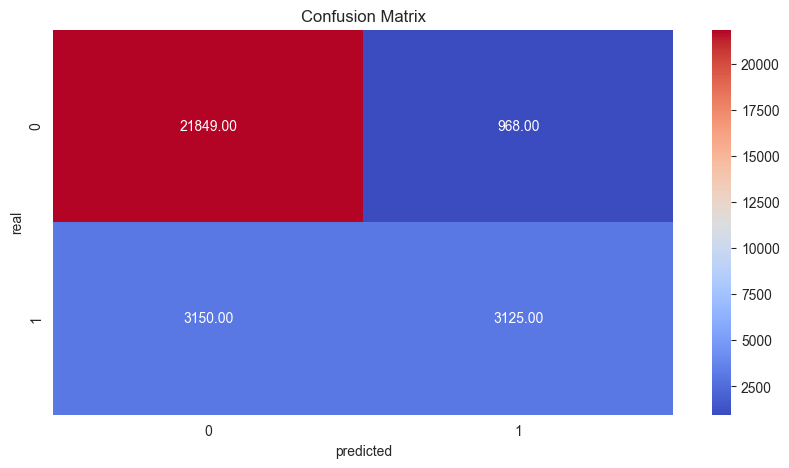


Gradient Boosting Accuracy: 0.8517805582290664
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22817
           1       0.74      0.49      0.59      6275

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092


 roc_auc: 0.7194967685902749


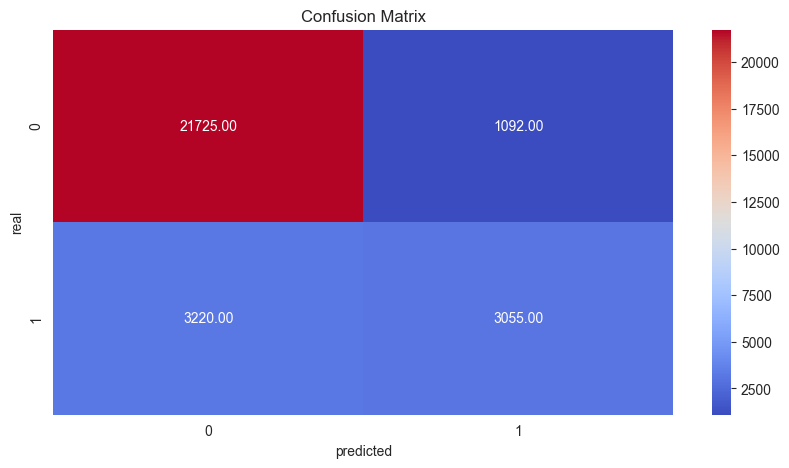


xgb_clf Accuracy: 0.8186786745497043
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     22817
           1       0.56      0.76      0.65      6275

    accuracy                           0.82     29092
   macro avg       0.74      0.80      0.76     29092
weighted avg       0.85      0.82      0.83     29092


 roc_auc: 0.799198874397663


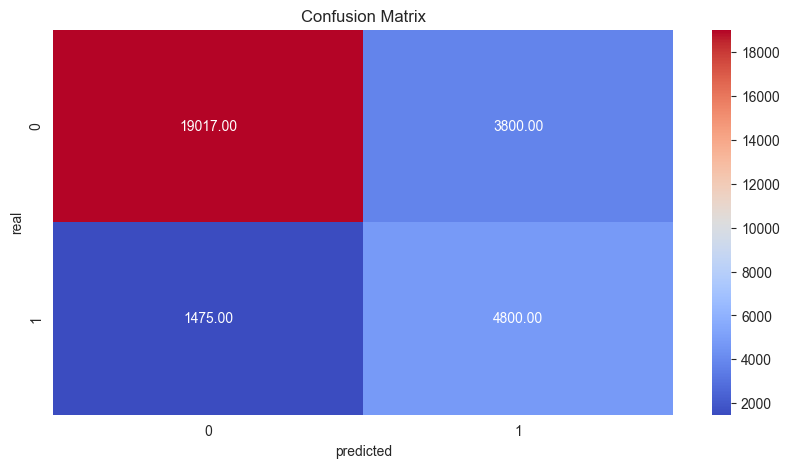

In [64]:
dataframe['RainTomorrow'] = dataframe['RainTomorrow'].astype('category').cat.codes
dataframe = dataframe.dropna()

for col in dataframe.select_dtypes(include='object').columns:
    dataframe[col] = dataframe[col].astype('category').cat.codes

X = dataframe.drop('RainTomorrow', axis=1)
y = dataframe['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'xgb_clf' : XGBClassifier(random_state=42, scale_pos_weight=3.6)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    roc_auc = roc_auc_score(y_test, y_pred)   
    
    print(f"\n{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(f"\n roc_auc: {roc_auc}")
    
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,5))
    sns.heatmap(confusion, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Confusion Matrix')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()

In [65]:
print('总的来看，xgb的模型更好')
param_dist = {  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1.0 , 1.5 ,2.0,2.1, 2.8, 3.6]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,  
    cv=3,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]

print("Best Parameters:", random_search.best_params_)
print("\nXGBoost Tuned Report:\n", classification_report(y_test, y_pred_best))
print("\nXGBoost Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_best)
print(f"\nXGBoost Tuned ROC AUC: {roc_auc}")

总的来看，xgb的模型更好
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

XGBoost Tuned Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92     22817
           1       0.76      0.55      0.64      6275

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092


XGBoost Tuned Confusion Matrix:
 [[21697  1120]
 [ 2823  3452]]

XGBoost Tuned ROC AUC: 0.8941680759104093


Epoch 1/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 0.7236 - loss: 0.4933 - precision: 0.4850 - recall: 0.3395 - val_auc: 0.8349 - val_loss: 0.3889 - val_precision: 0.6615 - val_recall: 0.4663
Epoch 2/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8222 - loss: 0.4061 - precision: 0.6353 - recall: 0.3882 - val_auc: 0.8496 - val_loss: 0.3740 - val_precision: 0.6838 - val_recall: 0.4846
Epoch 3/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8349 - loss: 0.3928 - precision: 0.6601 - recall: 0.3994 - val_auc: 0.8548 - val_loss: 0.3674 - val_precision: 0.6967 - val_recall: 0.4888
Epoch 4/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8423 - loss: 0.3843 - precision: 0.6729 - recall: 0.4167 - val_auc: 0.8577 - val_loss: 0.3637 - val_precision: 0.7030 - val_recall: 0.4915
Epoch 5/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8454 - loss: 0.3805 - precision: 0.6806 - recall: 0.4336 - val_auc: 0.8601 - val_loss: 0.3605 - val_precision: 0.7201 - val_recall: 0.4743


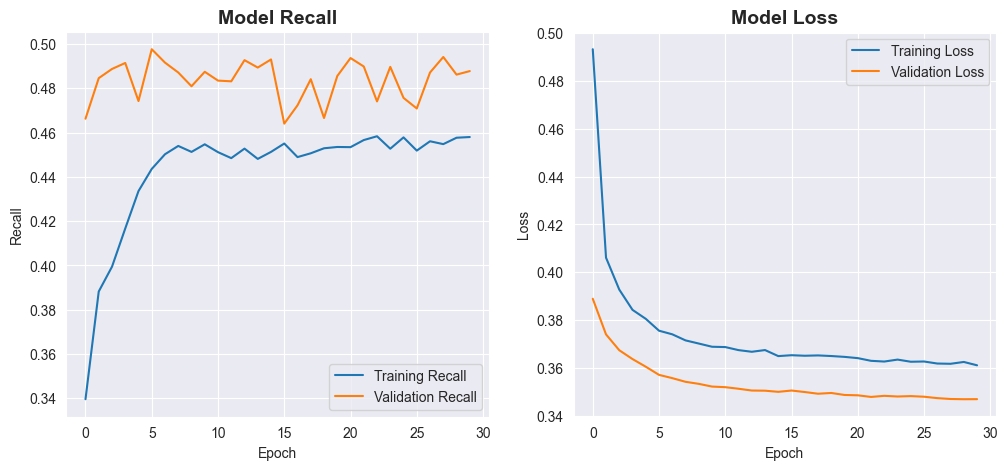

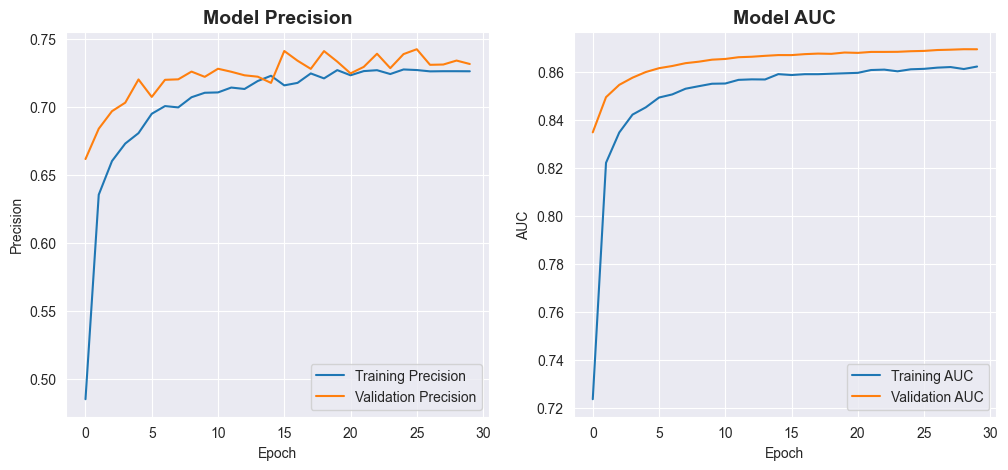

In [66]:
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        metrics.Recall(name='recall'),
        metrics.Precision(name='precision'),
        metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train, y_train,                   # 直接用 0/1 标签
    validation_data=(X_test, y_test),
    epochs=30, batch_size=512, verbose=1
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

考虑到recall曲线波动太大，但有可能是因为样本不平衡，所以补一个roc曲线看看
910/910 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


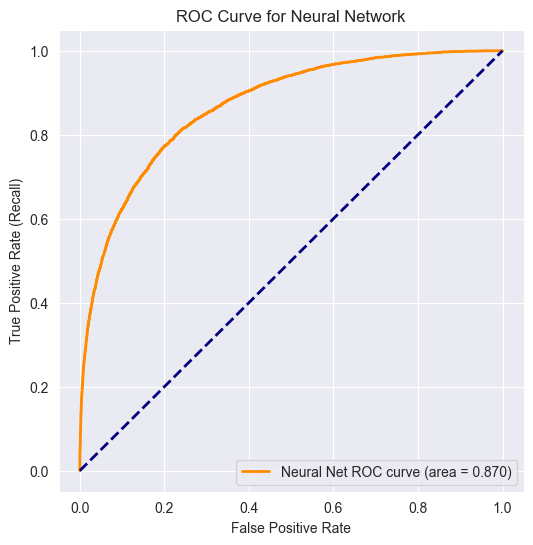

In [67]:
print('考虑到recall曲线波动太大，但有可能是因为样本不平衡，所以补一个roc曲线看看')

y_pred_proba = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Net ROC curve (area = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

In [68]:
print('没问题')

没问题


In [71]:
#该数据AI随机生成的
new_data = pd.DataFrame([{
    "Date": "2025-08-17",        
    "Location": "Adelaide",        
    "MinTemp": 10.5,
    "MaxTemp": 22.4,
    "Rainfall": 0.0,
    "Evaporation": 3.2,
    "Sunshine": 7.1,
    "WindGustDir": "N",
    "WindGustSpeed": 39,
    "WindDir9am": "NW",
    "WindDir3pm": "W",
    "WindSpeed9am": 6,
    "WindSpeed3pm": 17,
    "Humidity9am": 80,
    "Humidity3pm": 56,
    "Pressure9am": 1012.3,
    "Pressure3pm": 1009.5,
    "Cloud9am": 5,
    "Cloud3pm": 3,
    "Temp9am": 15.0,
    "Temp3pm": 20.5,
    "RainToday": "No"
}])

for col in new_data.select_dtypes(include="object").columns:
    new_data[col] = new_data[col].astype("category").cat.codes

new_scaled = scaler.transform(new_data)

xgb_pred = best_xgb.predict(new_scaled)
xgb_proba = best_xgb.predict_proba(new_scaled)[:,1]

print("XGBoost 预测结果:", xgb_pred[0])
print("XGBoost 下雨概率:", xgb_proba[0])

该数据AI随机生成的
XGBoost 预测结果: 0
XGBoost 下雨概率: 0.25865296
